In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\bluechip\Downloads\census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
19098,35,Private,186035,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
print('No. of row :',df.shape[0])
print('No. of columns:',df.shape[1])


No. of row : 32560
No. of columns: 15


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

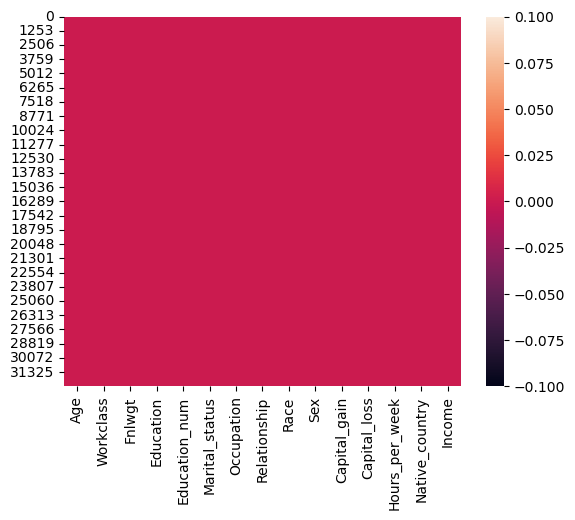

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df['Income'].nunique()

2

In [13]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [14]:
(df == ' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [15]:
df.replace({' ?':np.nan},inplace=True)

In [16]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [17]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


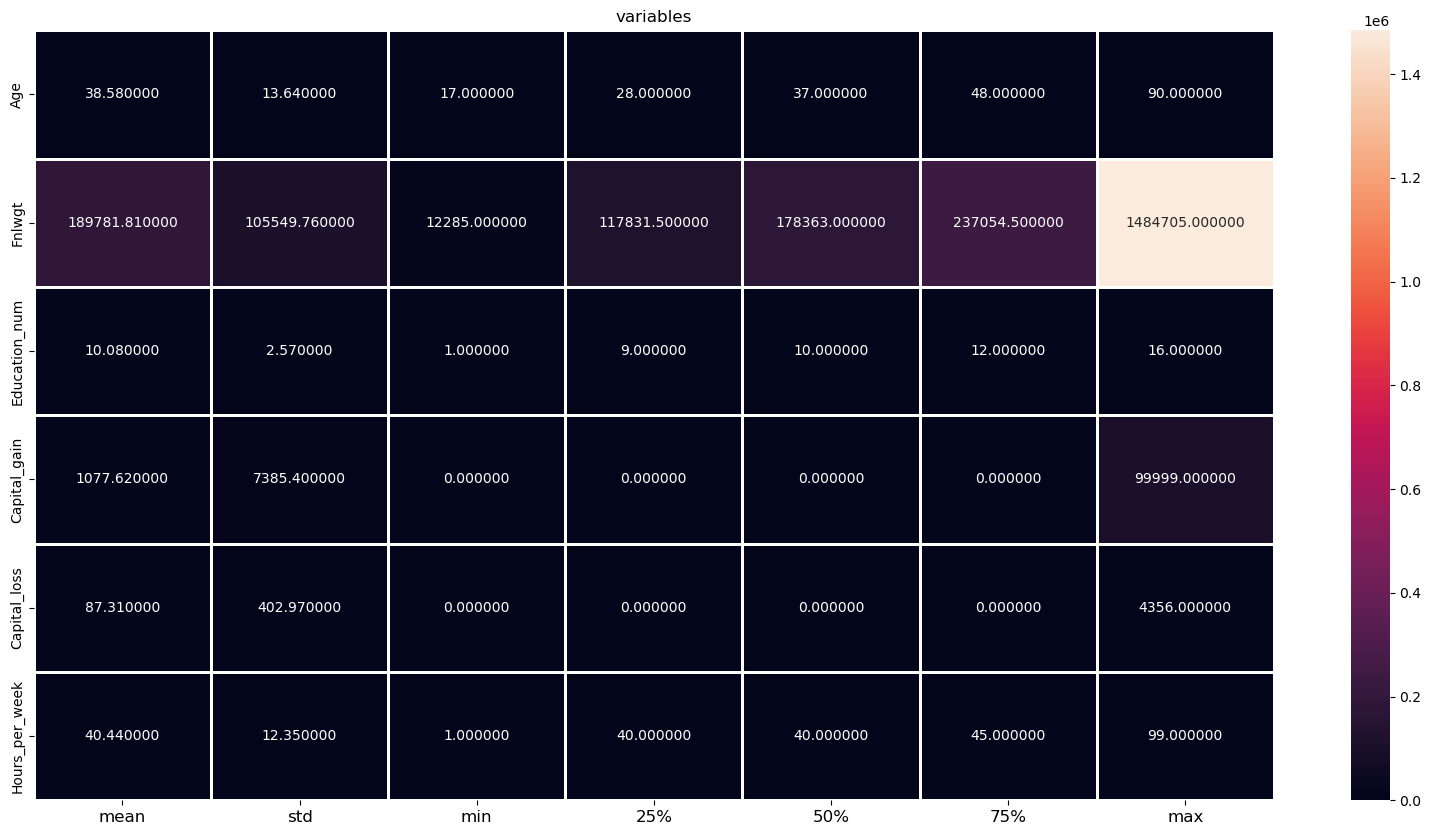

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

In [19]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [20]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [22]:
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)

In [23]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
df['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [25]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)

In [26]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [28]:
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [29]:
df['Capital_gain'].fillna(df['Capital_gain'].mode()[0],inplace=True)

In [30]:
df['Capital_loss'].fillna(df['Capital_loss'].mode()[0],inplace=True)

In [31]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [32]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [33]:
col_n=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
col_cat=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

income_cat=df.drop(columns=col_cat,axis=1)
income_n=df.drop(columns=col_n,axis=1)

Count Plot for  Workclass  column
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


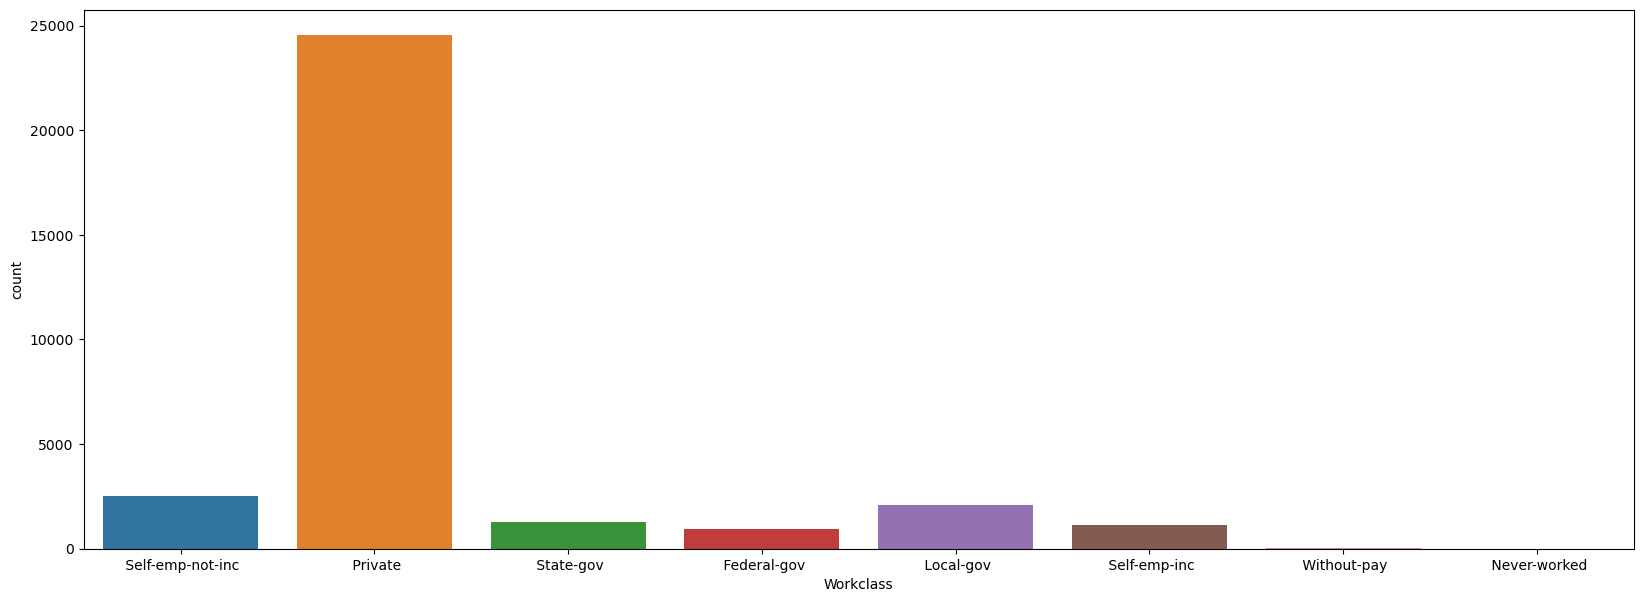

Count Plot for  Education  column
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


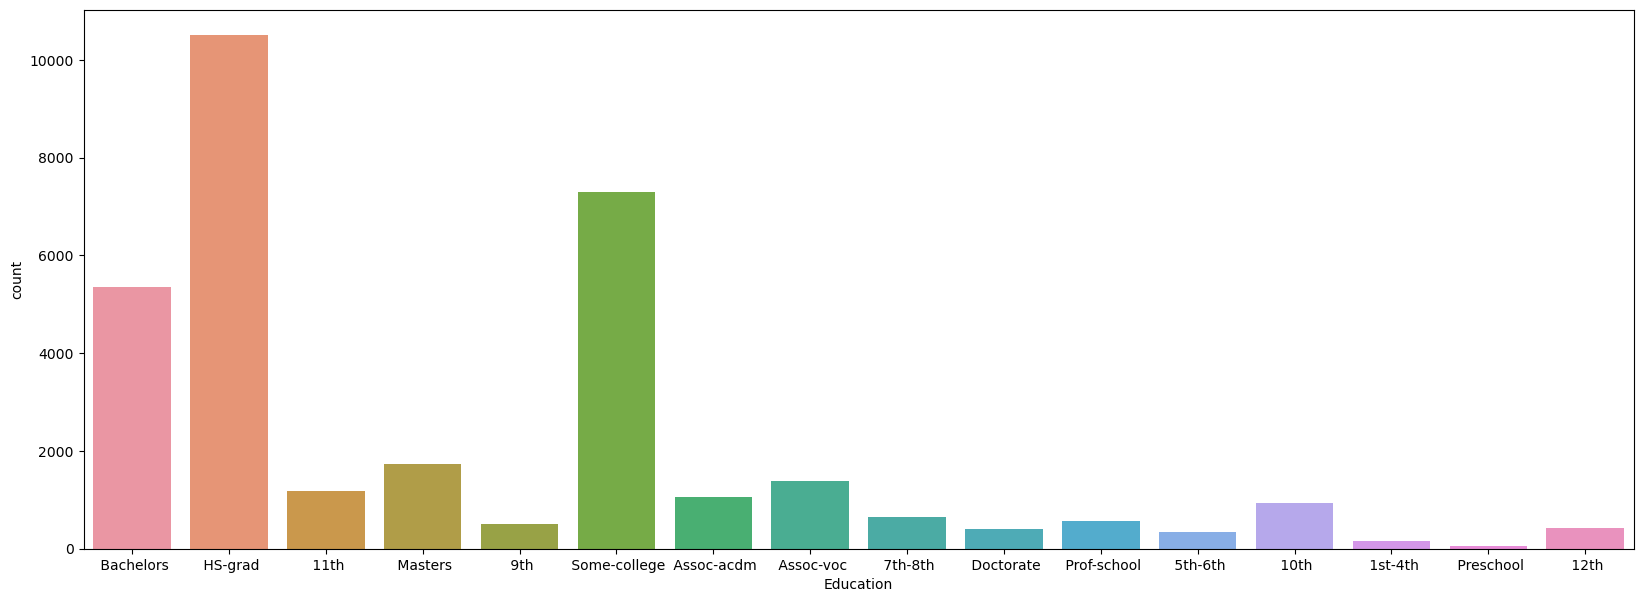

Count Plot for  Marital_status  column
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


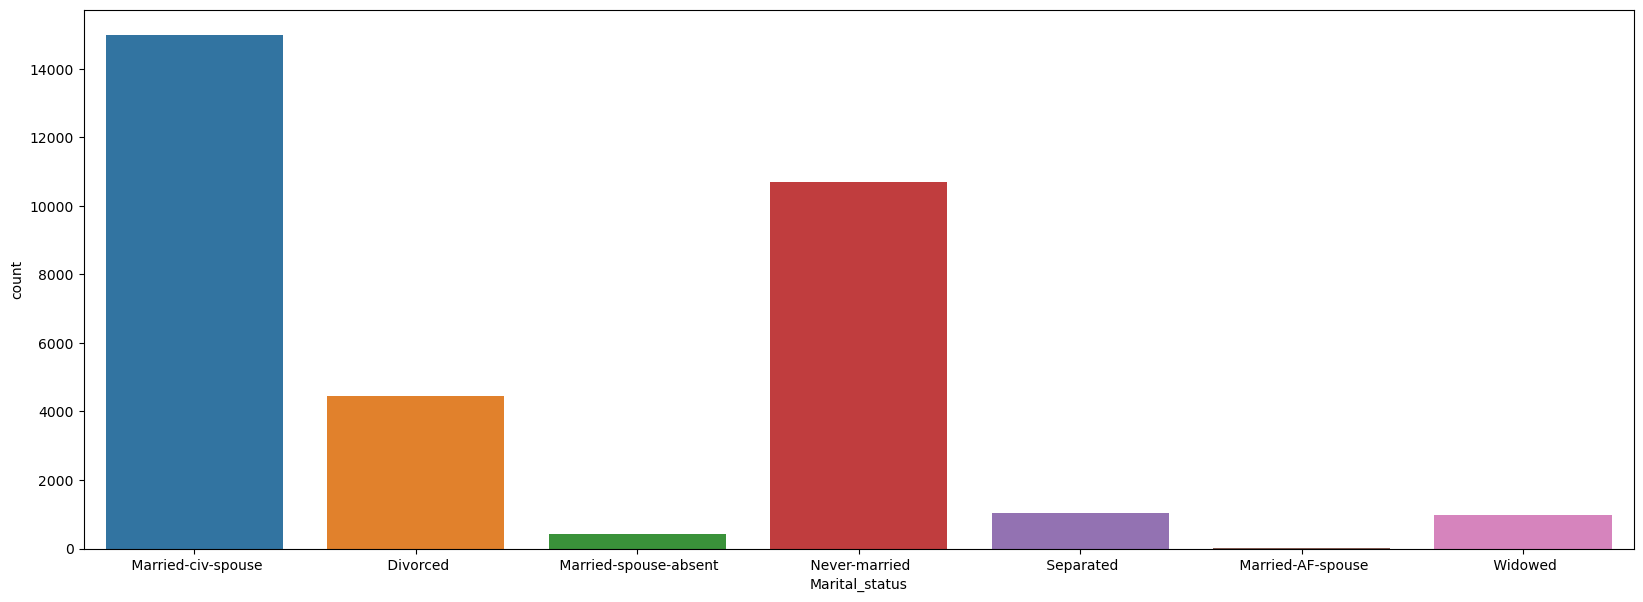

Count Plot for  Occupation  column
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


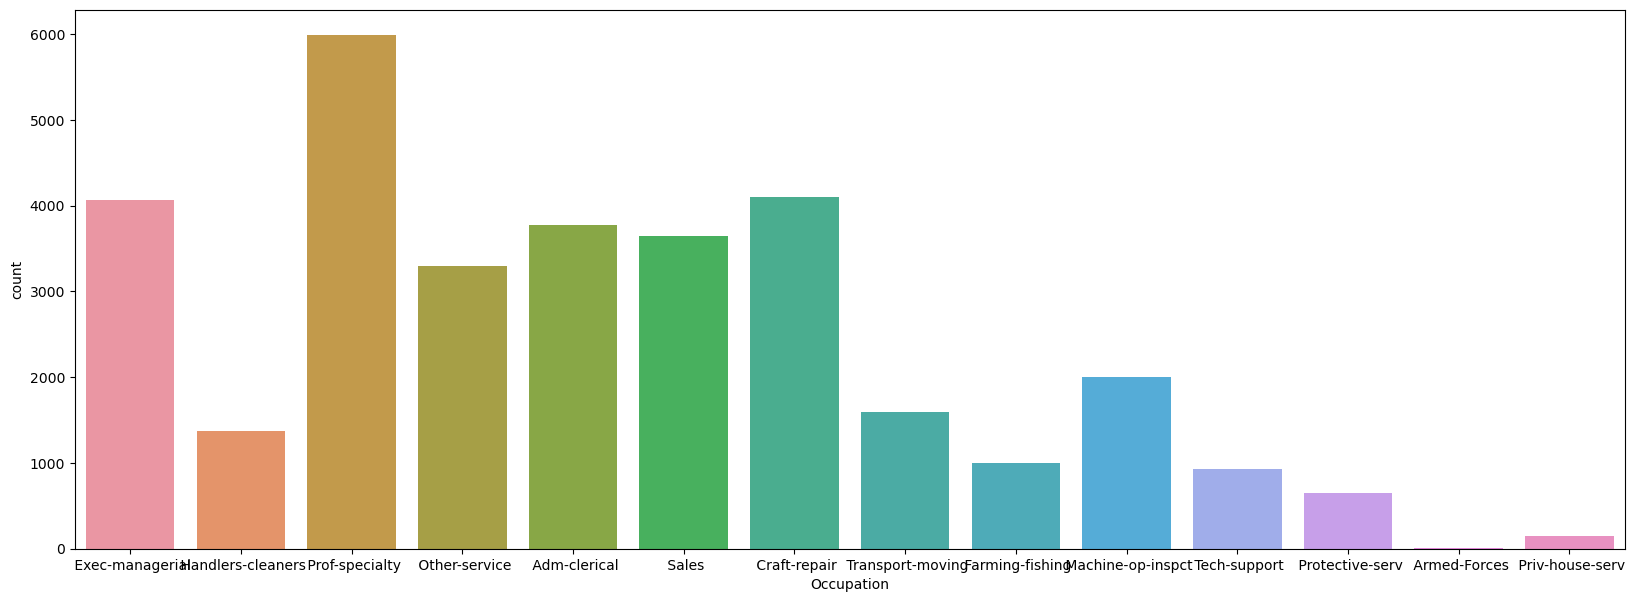

Count Plot for  Relationship  column
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


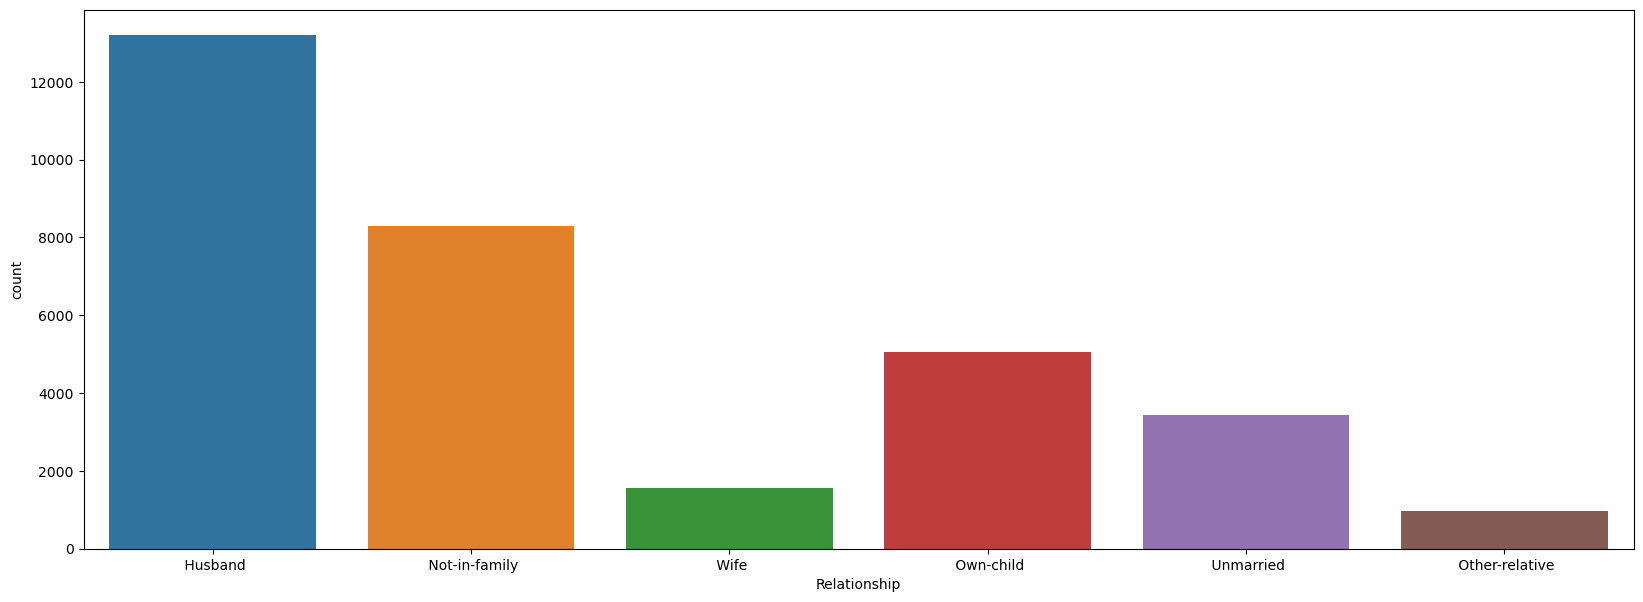

Count Plot for  Race  column
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


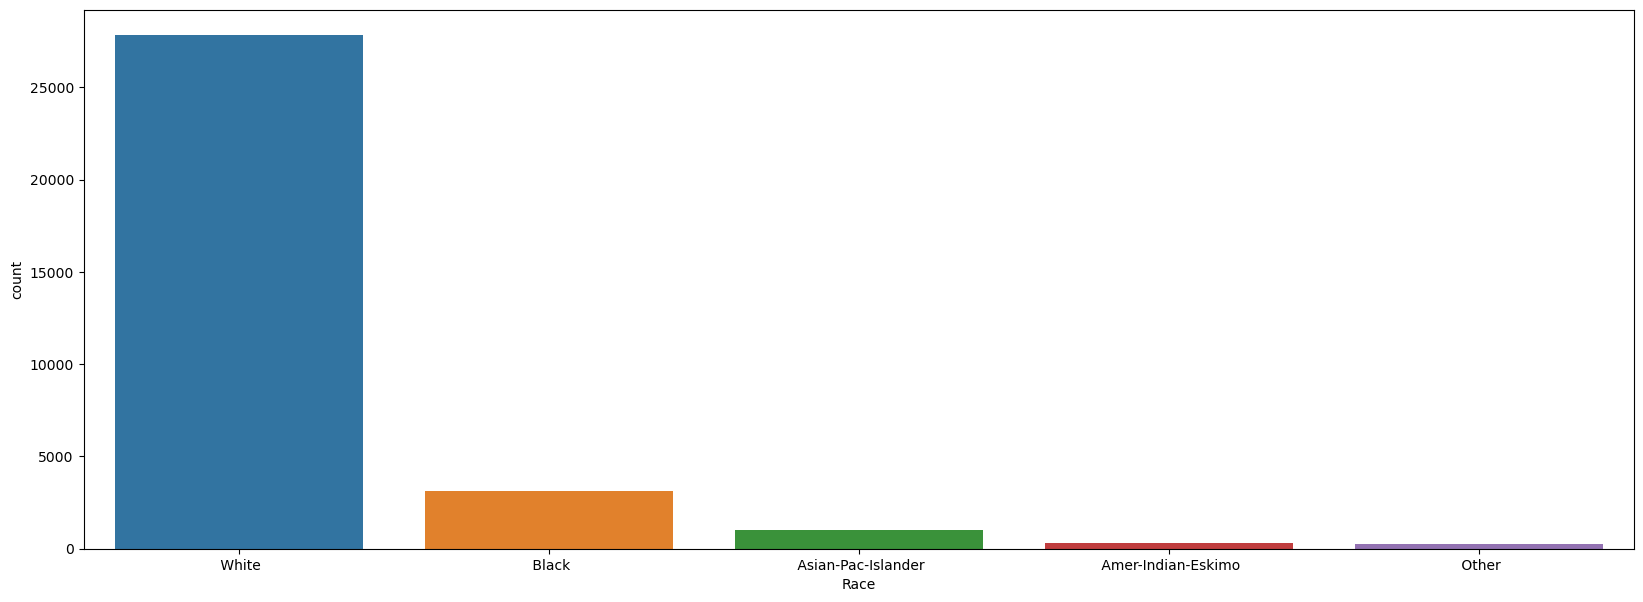

Count Plot for  Sex  column
 Male      21789
 Female    10771
Name: Sex, dtype: int64


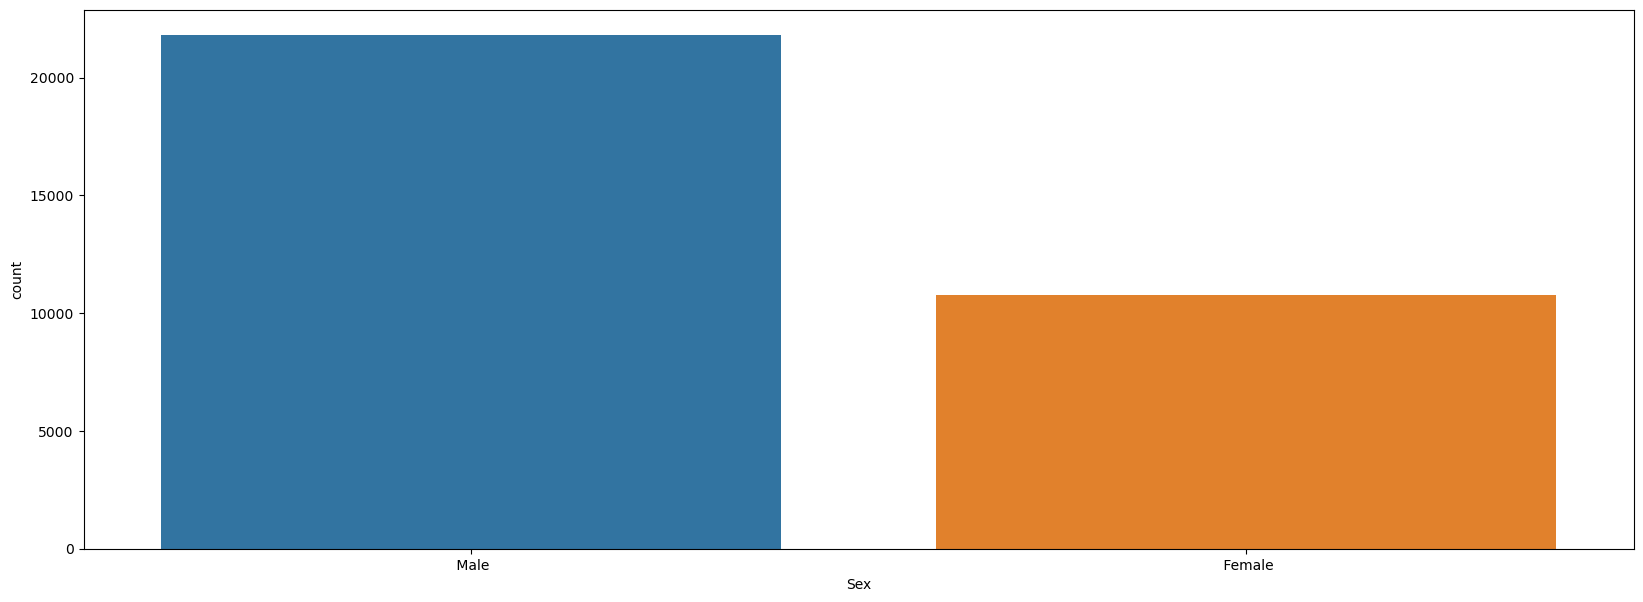

Count Plot for  Native_country  column
 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31

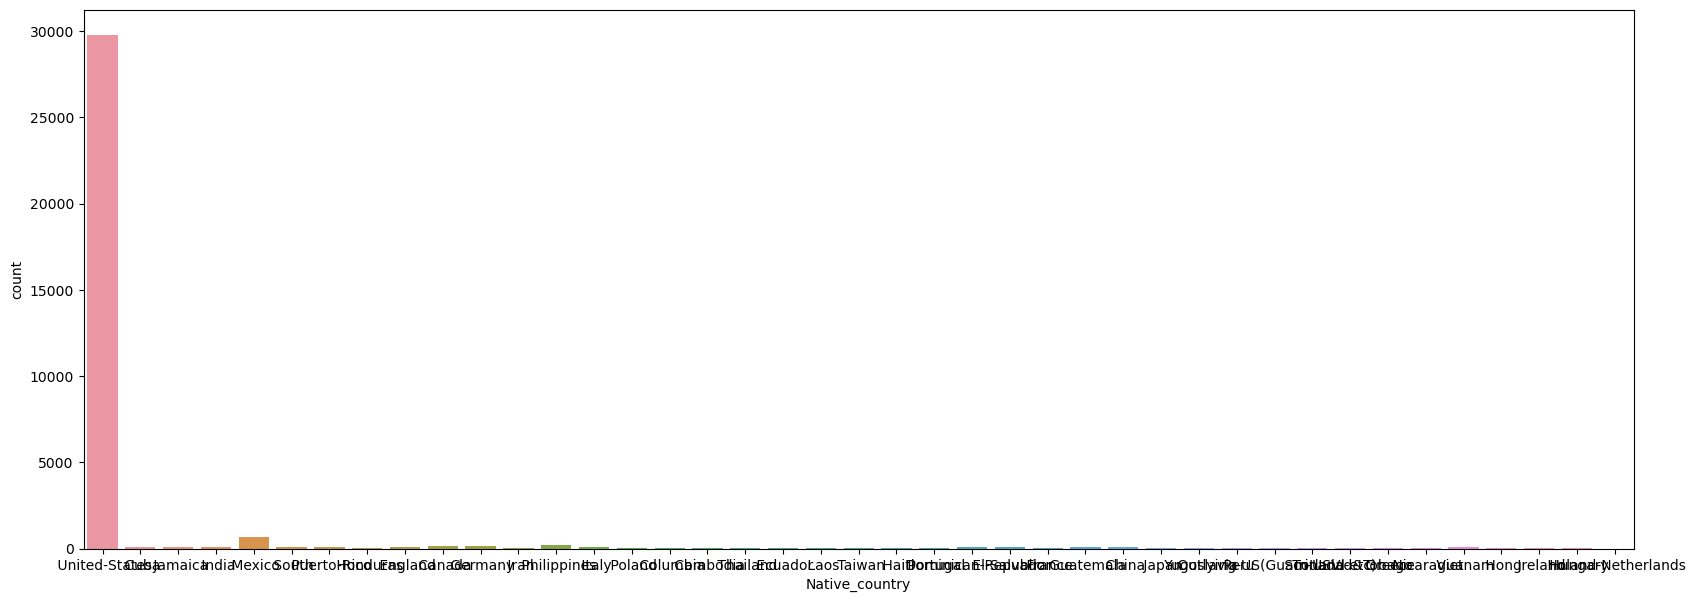

Count Plot for  Income  column
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


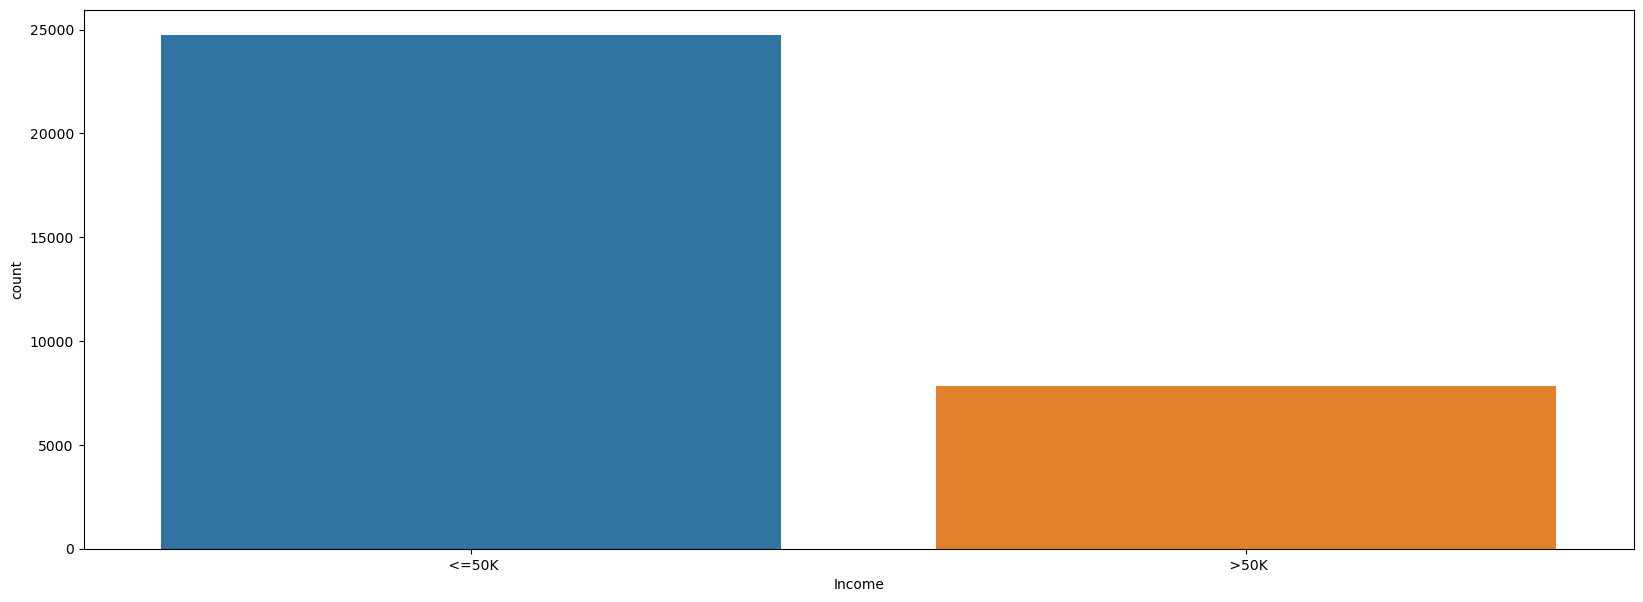

In [34]:
for i in income_cat:
    print('Count Plot for ',i,' column')
    plt.figure(figsize=(20,7))
    print(df[i].value_counts())
    sns.countplot(i,data=income_cat)
    print("=====================================")
    plt.show()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

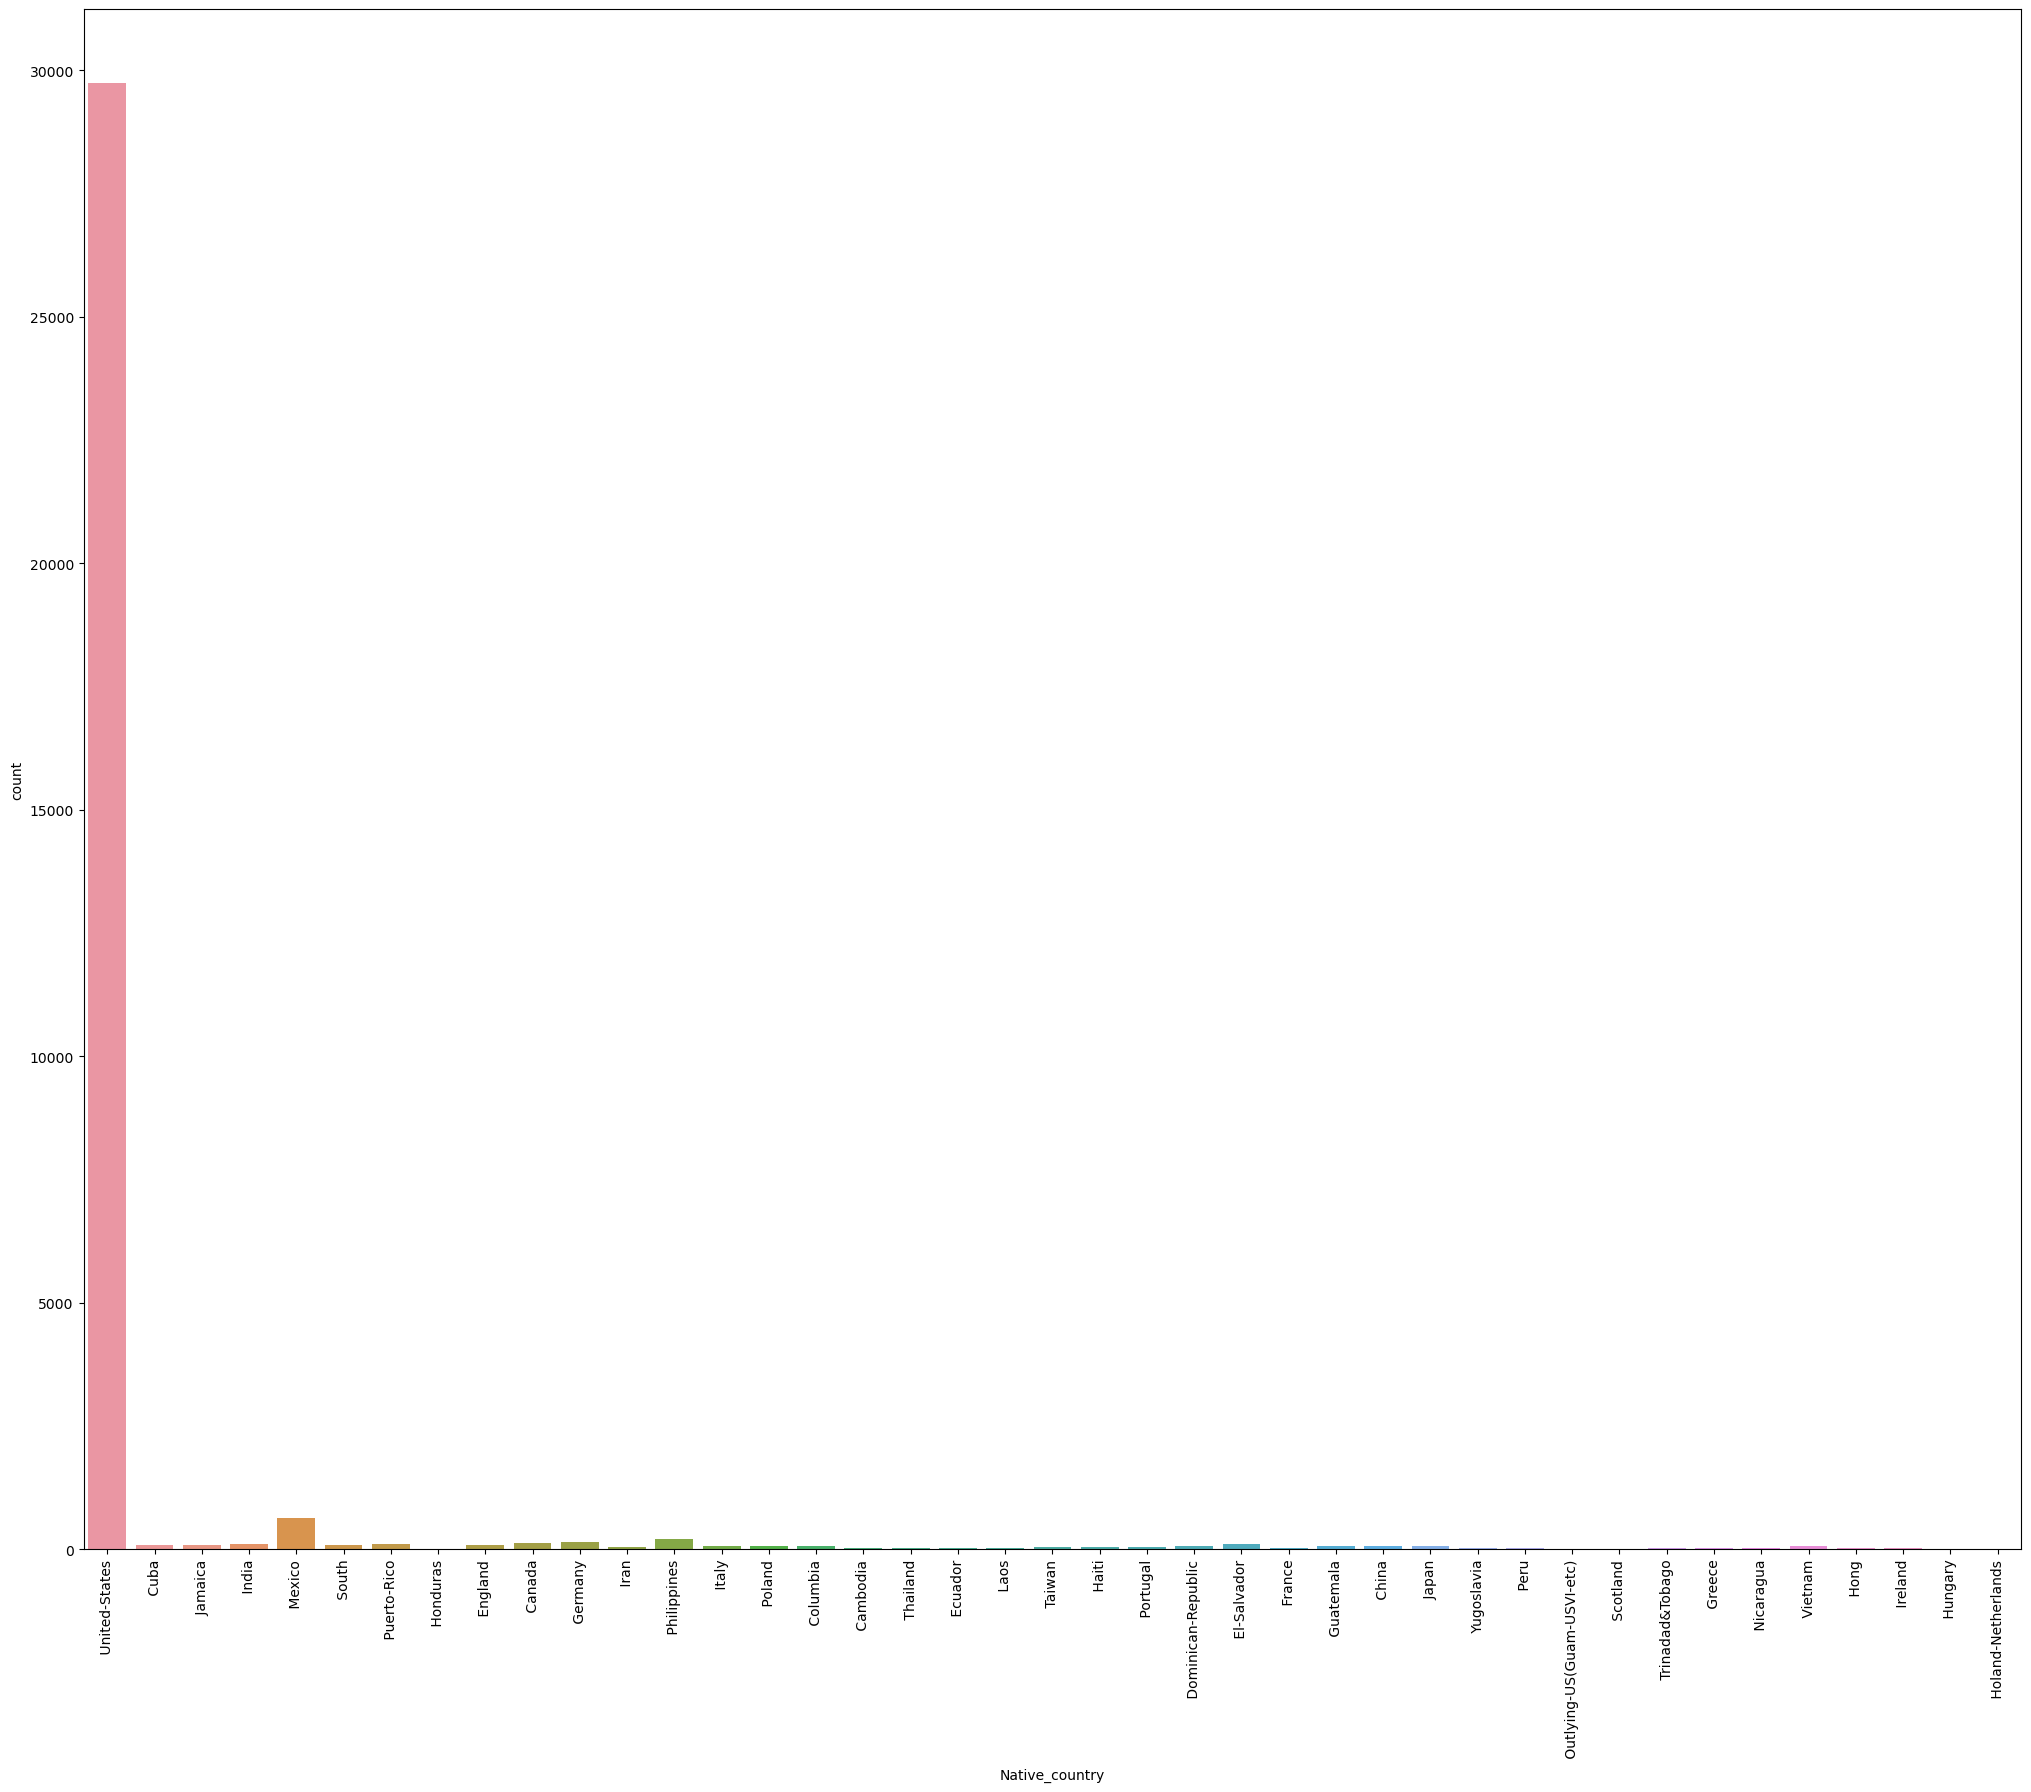

In [35]:
print(df["Native_country"].value_counts())
plt.figure(figsize=(25,20))
plt.xticks(rotation=90)
sns.countplot(x="Native_country",data=df)

#Histplot for  Age  column
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


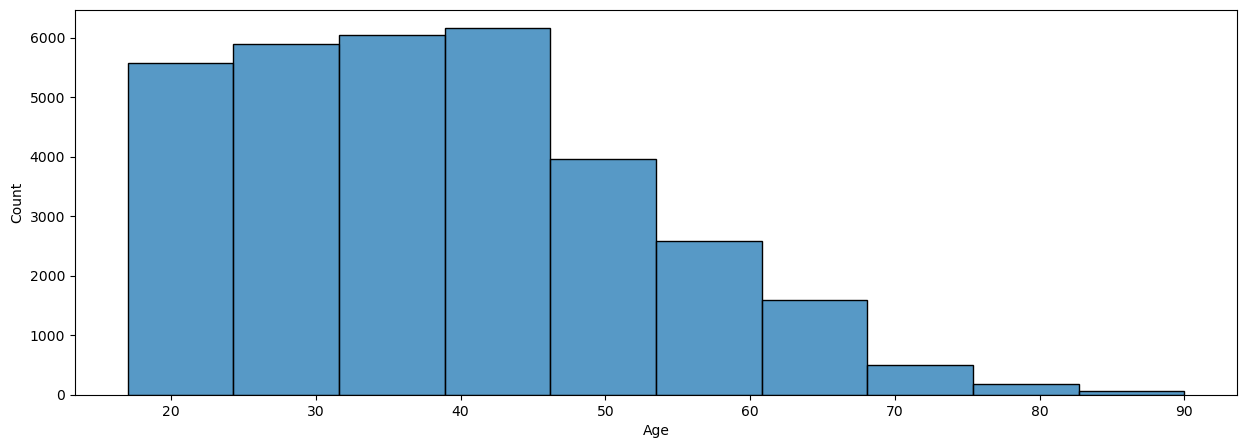

#Histplot for  Fnlwgt  column
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


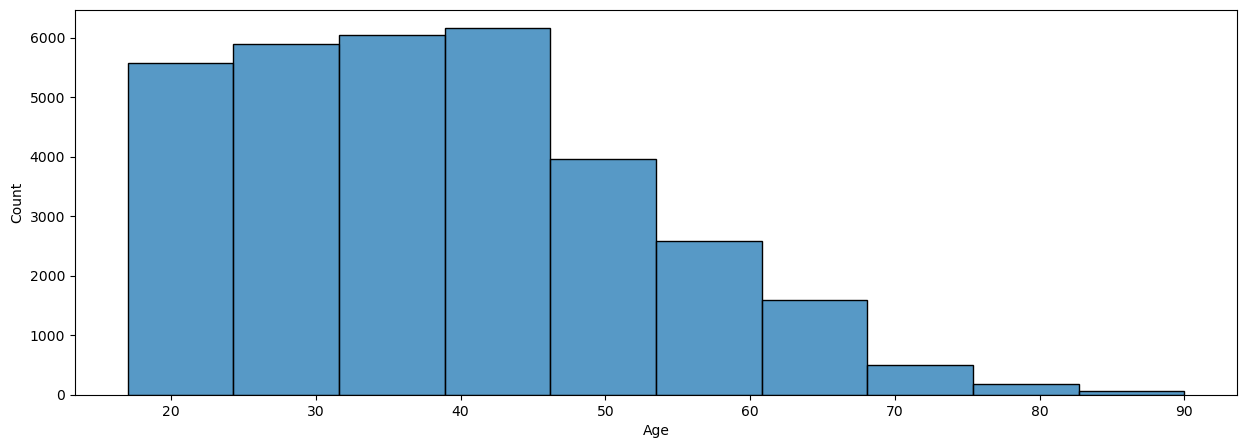

#Histplot for  Education_num  column
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


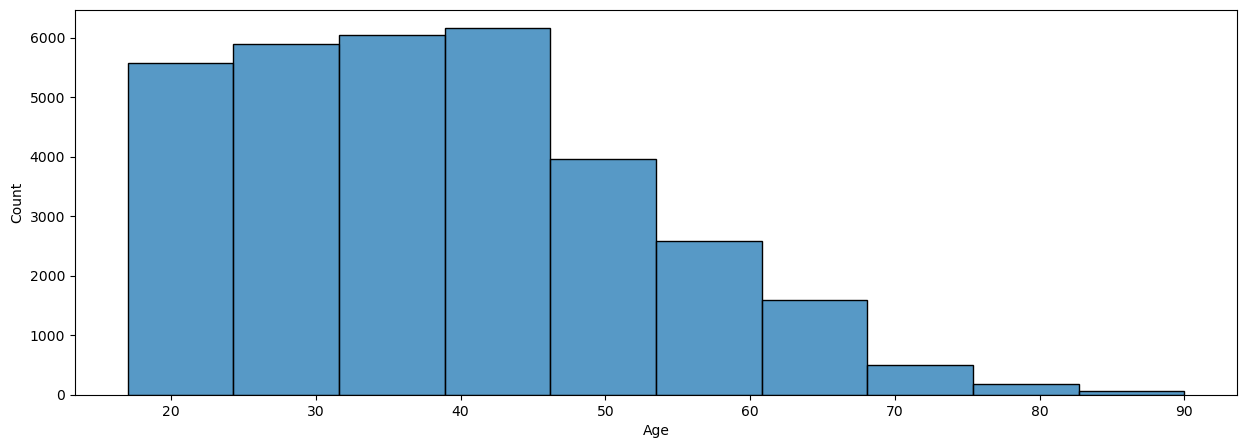

#Histplot for  Capital_gain  column
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


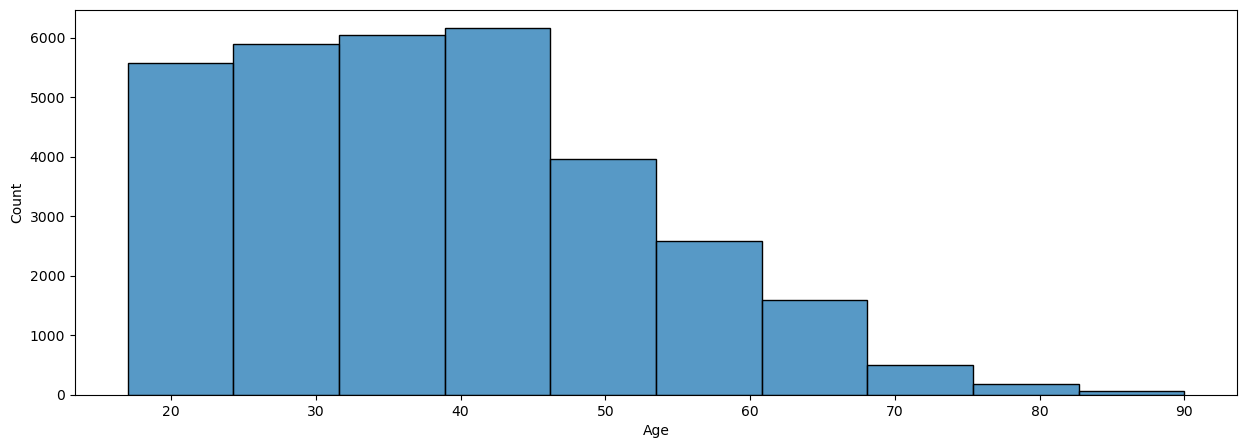

#Histplot for  Capital_loss  column
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


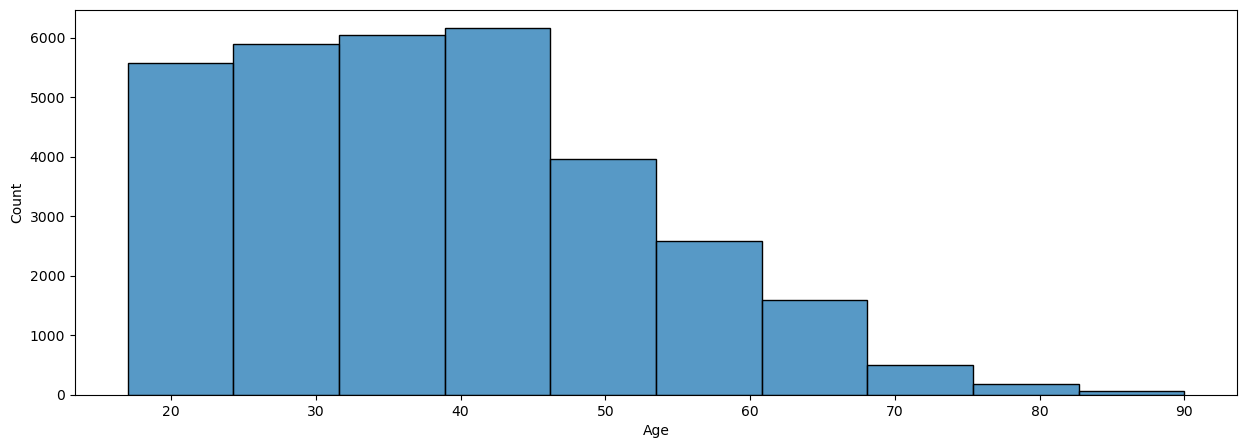

#Histplot for  Hours_per_week  column
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


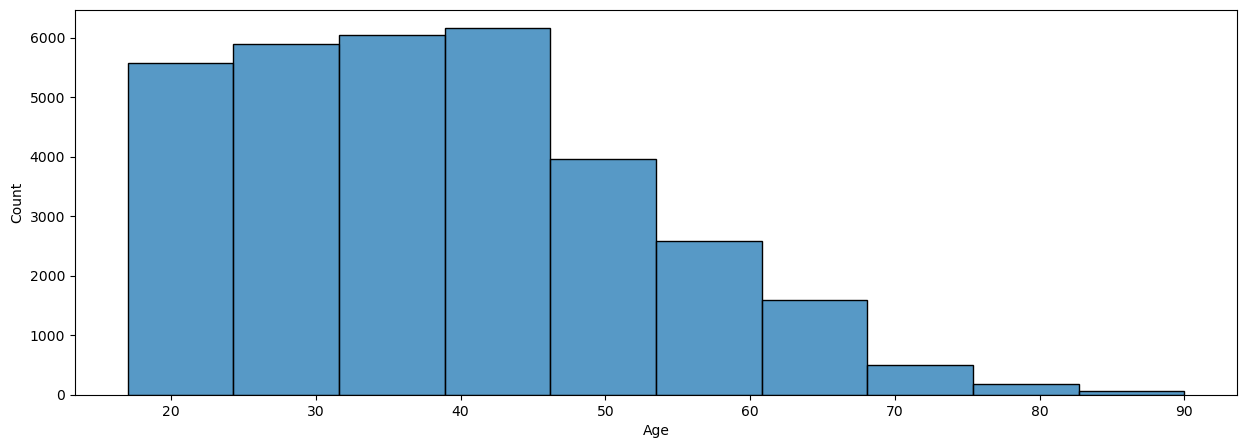

In [36]:
for j in income_n:
    print('#Histplot for ',j,' column')
    print(income_n[j].value_counts())
    plt.figure(figsize=(15,5))
    sns.histplot(x='Age',data=income_n,bins=10)
    plt.show()
    print('==============================================')

<AxesSubplot:xlabel='Workclass', ylabel='count'>

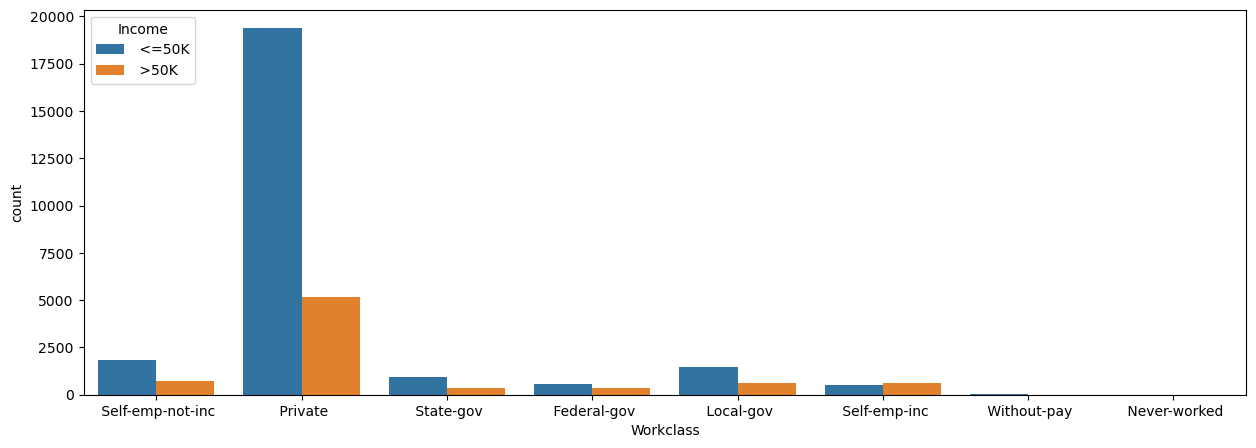

In [37]:
plt.figure(figsize=(15,5))
sns.countplot("Workclass",data=df, hue='Income')

<AxesSubplot:xlabel='Education', ylabel='count'>

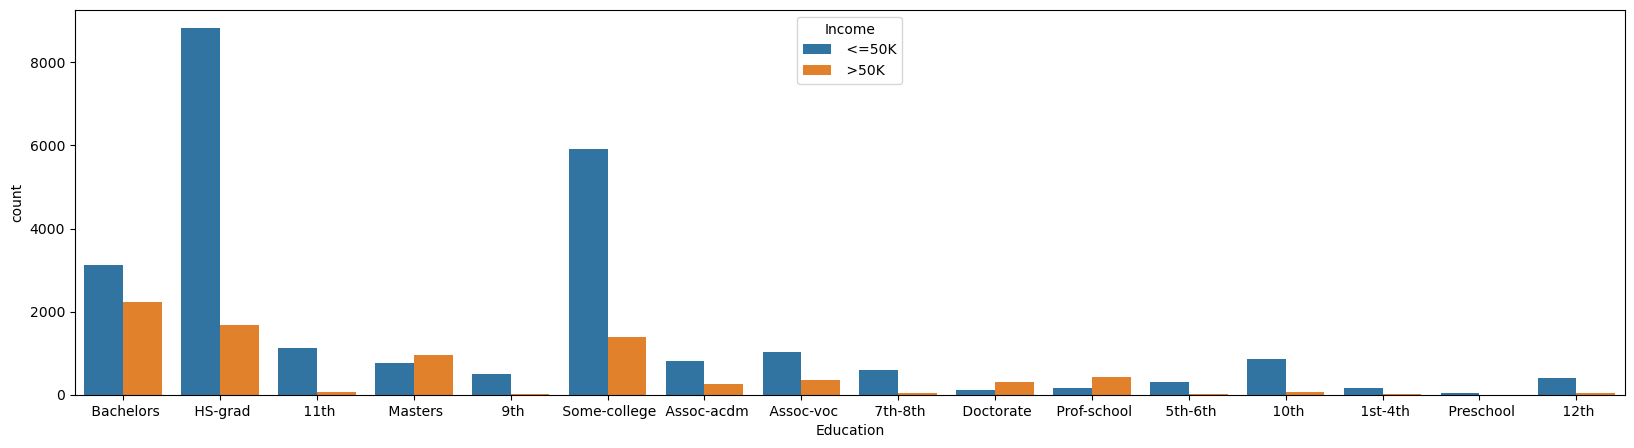

In [38]:
plt.figure(figsize=(20,5))
sns.countplot("Education",data=df, hue='Income')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

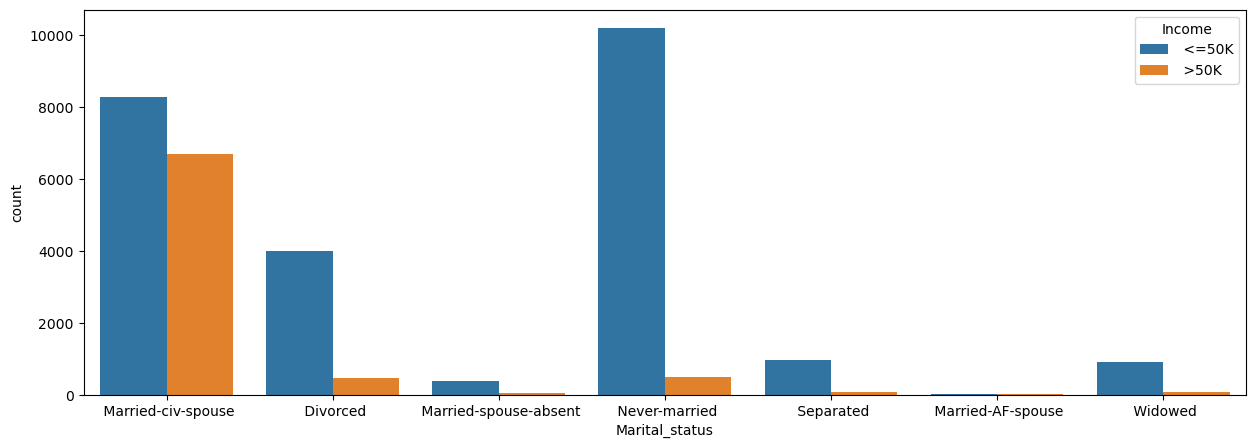

In [39]:
plt.figure(figsize=(15,5))
sns.countplot("Marital_status",data=df, hue='Income')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

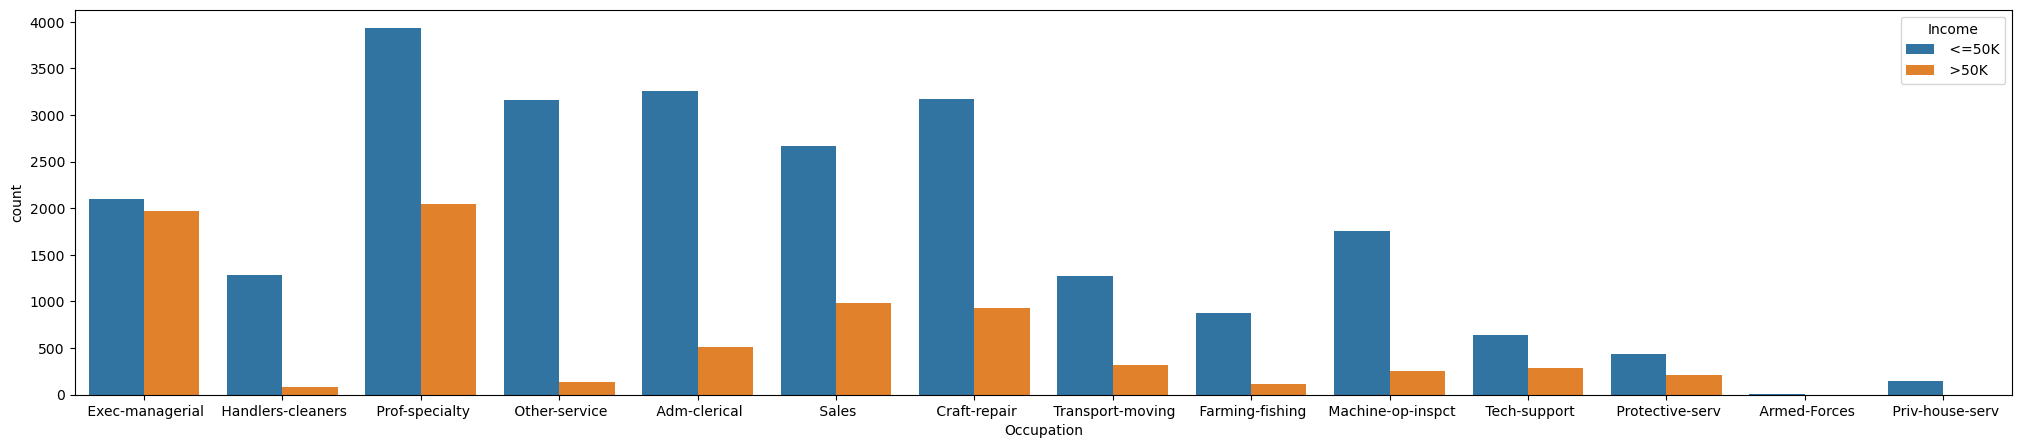

In [40]:
plt.figure(figsize=(25,5))
sns.countplot("Occupation",data=df, hue='Income')

<AxesSubplot:xlabel='Relationship', ylabel='count'>

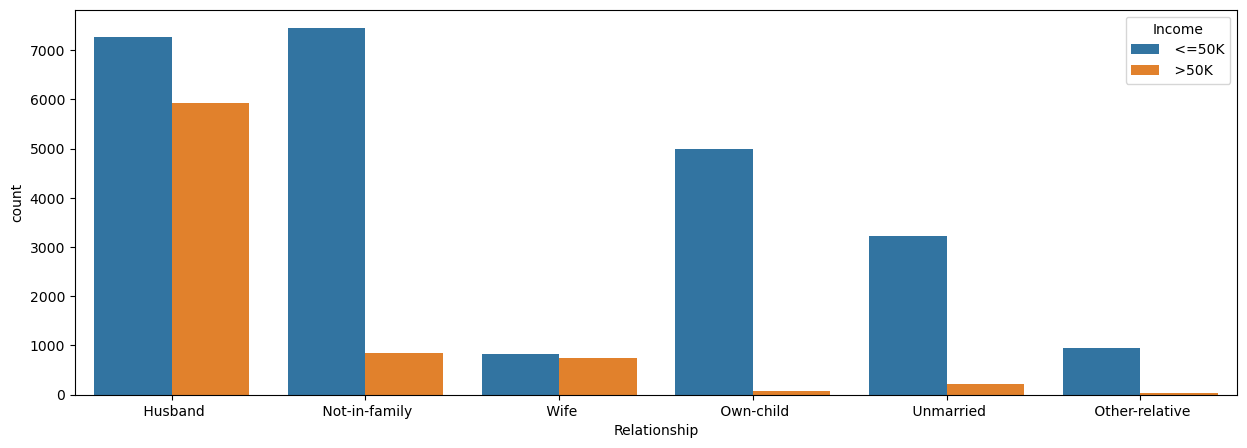

In [41]:
plt.figure(figsize=(15,5))
sns.countplot("Relationship",data=df, hue='Income')

<AxesSubplot:xlabel='Race', ylabel='count'>

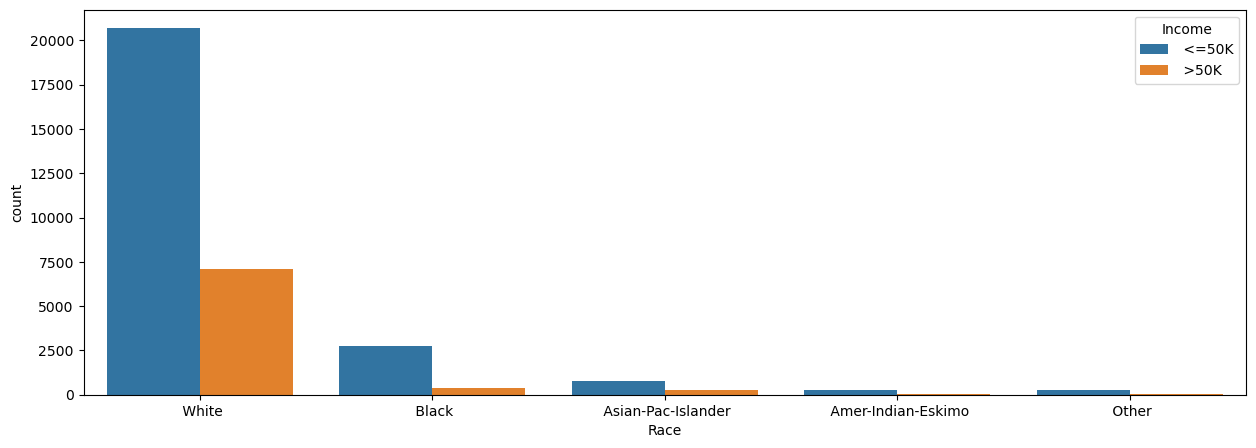

In [42]:
plt.figure(figsize=(15,5))
sns.countplot("Race",data=df, hue='Income')

<AxesSubplot:xlabel='Sex', ylabel='count'>

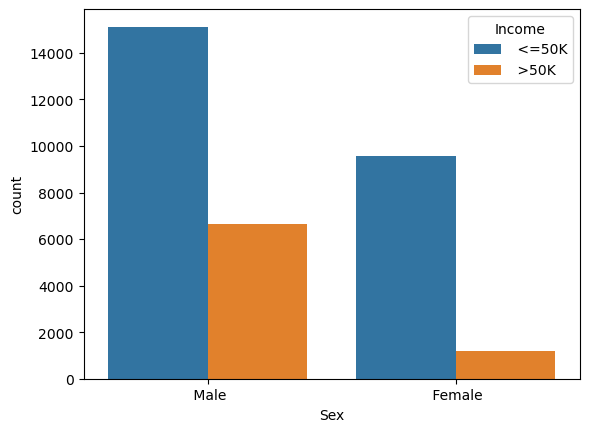

In [43]:
sns.countplot("Sex",data=df, hue='Income')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

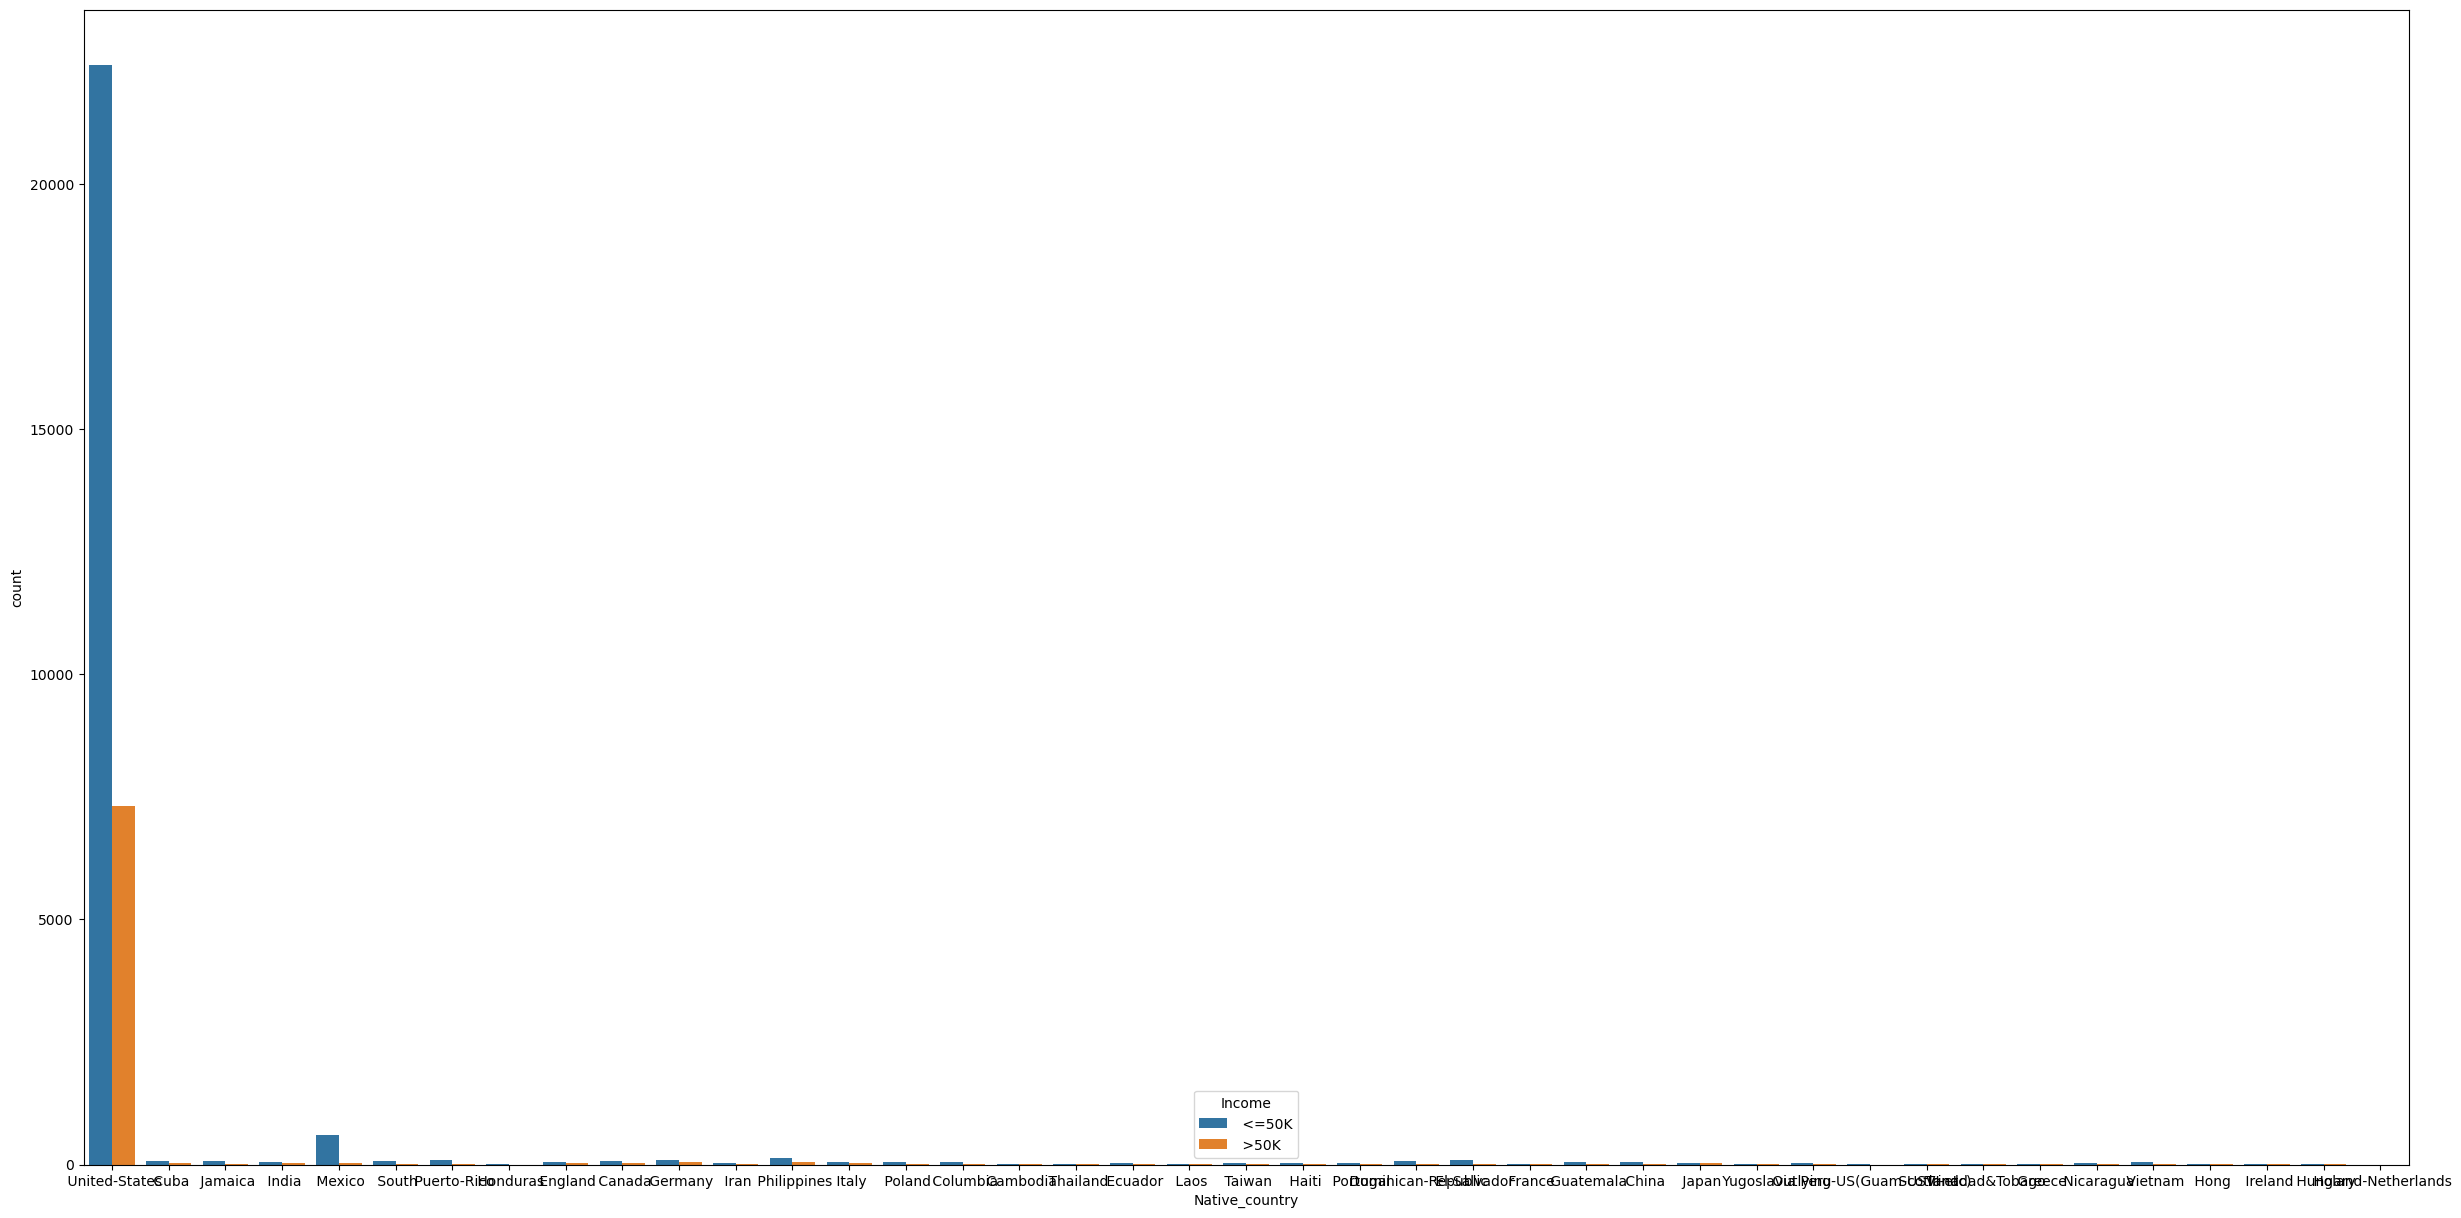

In [44]:
plt.figure(figsize=(30,15))
sns.countplot("Native_country",data=df, hue='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

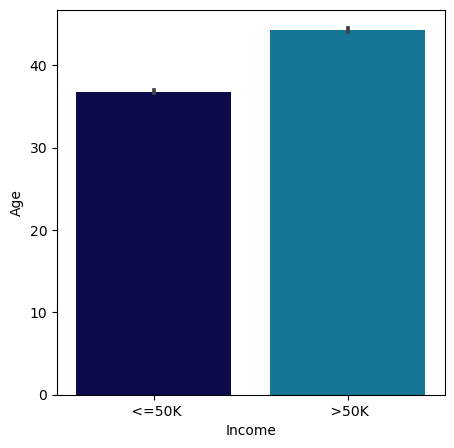

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(y='Age', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

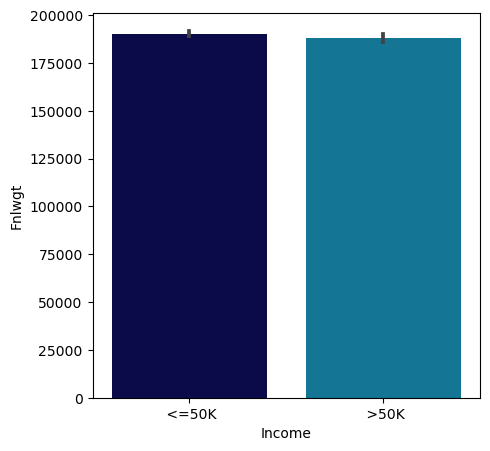

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(y='Fnlwgt', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

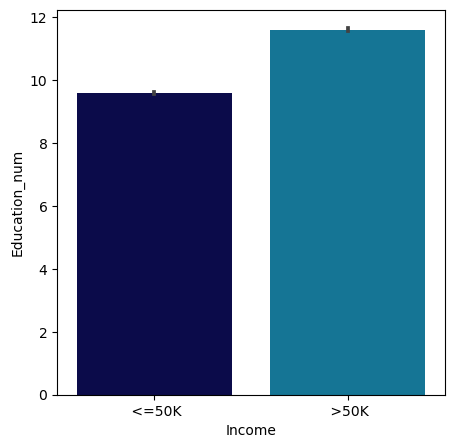

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(y='Education_num', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

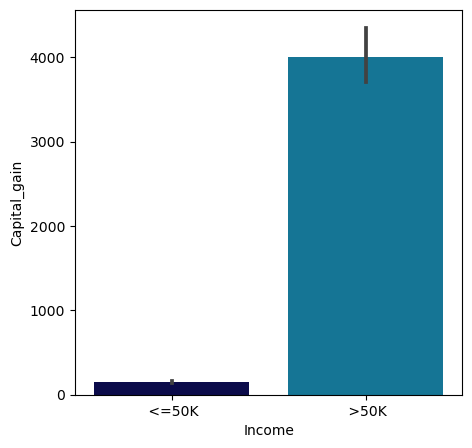

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(y='Capital_gain', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

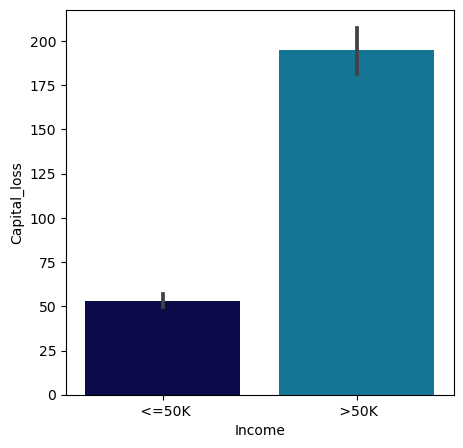

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(y='Capital_loss', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

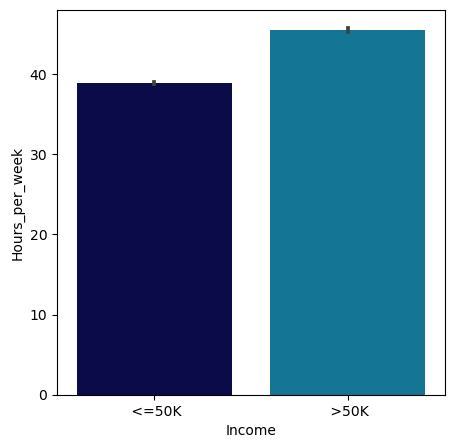

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(y='Hours_per_week', x='Income',data=df, palette='ocean')

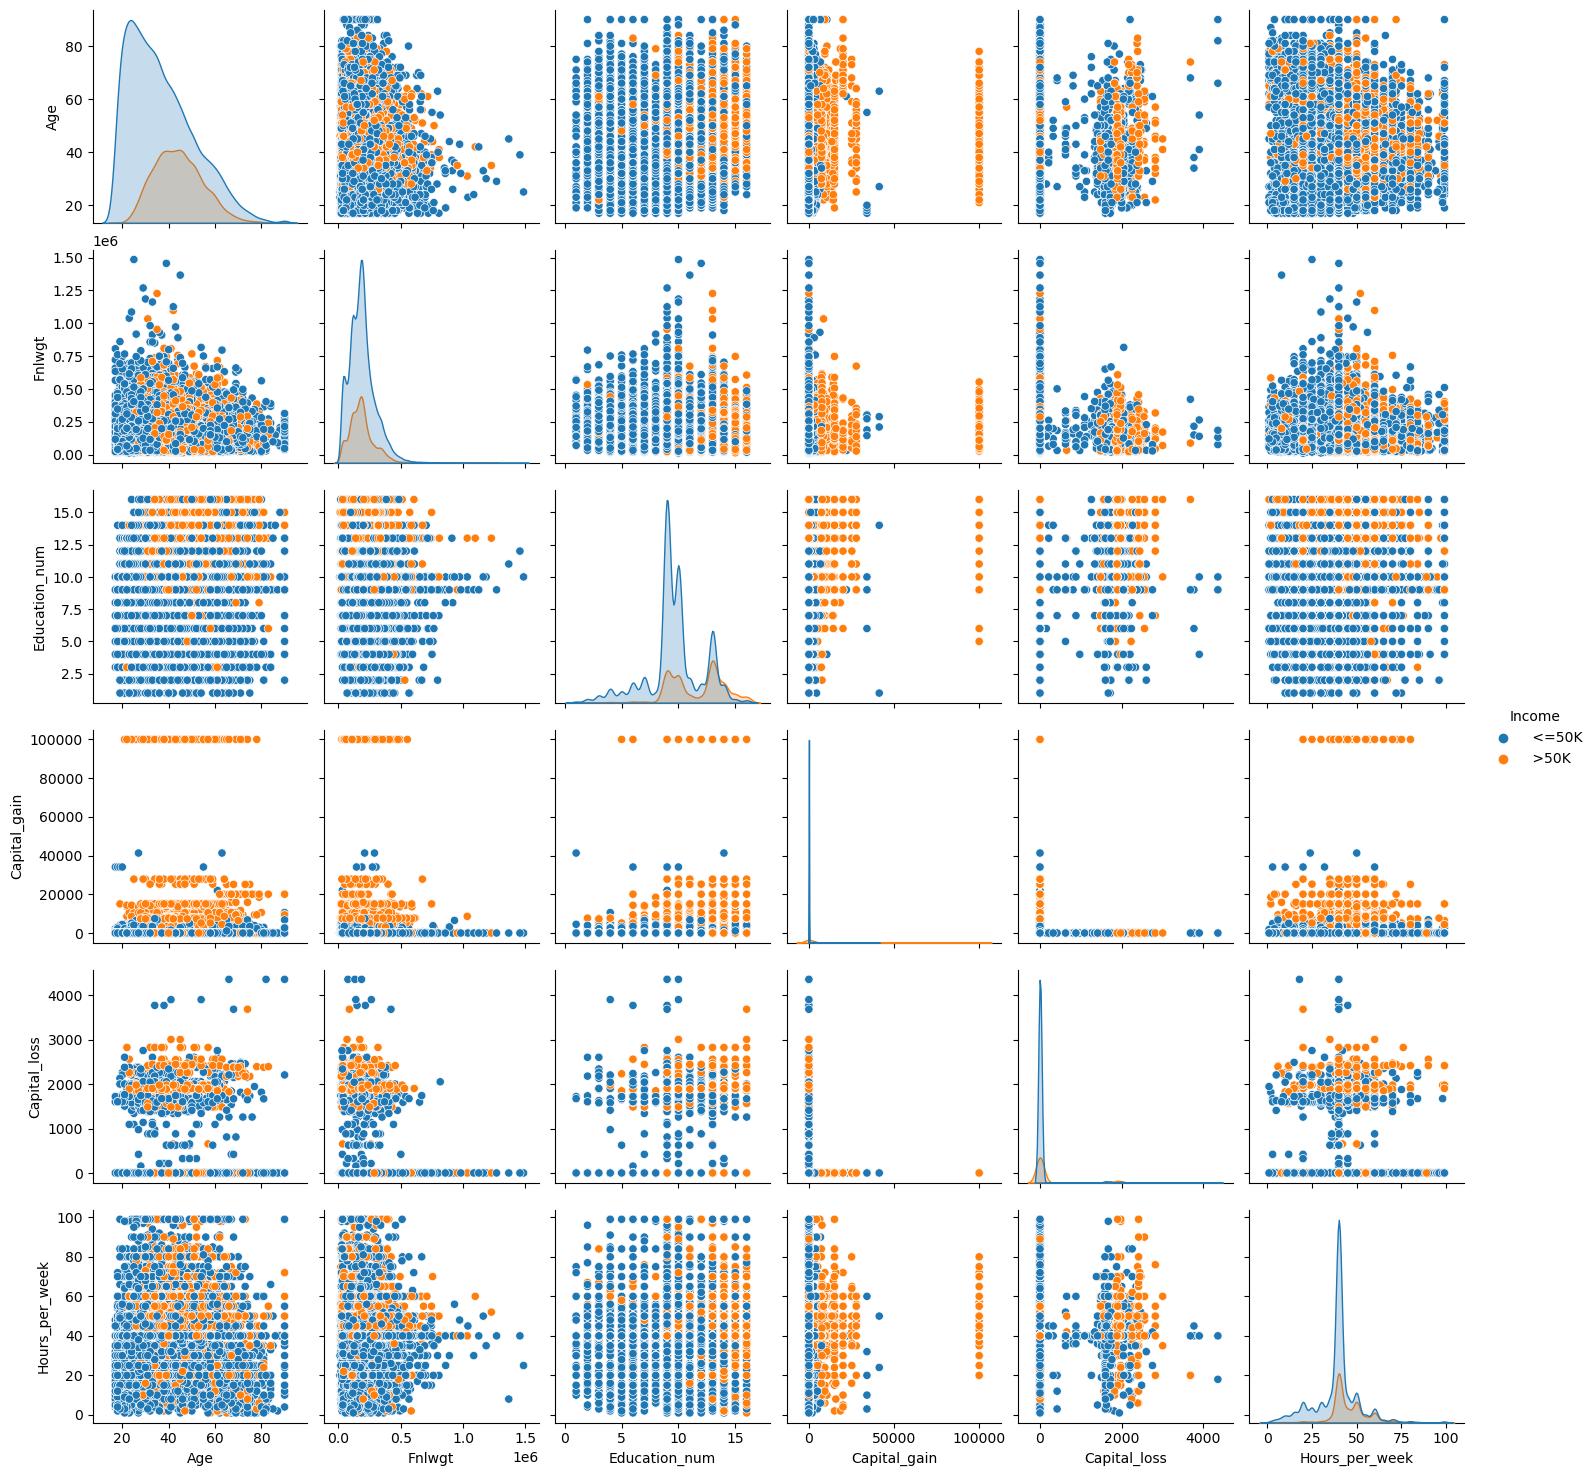

In [51]:
sns.pairplot(data=df,hue="Income")

In [52]:
df.drop(columns = "Capital_gain", inplace = True)

In [53]:
df.drop(columns = "Capital_loss", inplace = True)

In [54]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [55]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder=LabelEncoder()

In [58]:
df['Workclass'] = encoder.fit_transform(df['Workclass'])
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_status'] = encoder.fit_transform(df['Marital_status'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Relationship'] = encoder.fit_transform(df['Relationship'])
df['Race'] = encoder.fit_transform(df['Race'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Native_country'] = encoder.fit_transform(df['Native_country'])
df['Income'] = encoder.fit_transform(df['Income'])

In [59]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.229312,0.002055,0.215995


In [60]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.034599
Race              0.071853
Education         0.079311
Sex               0.215995
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

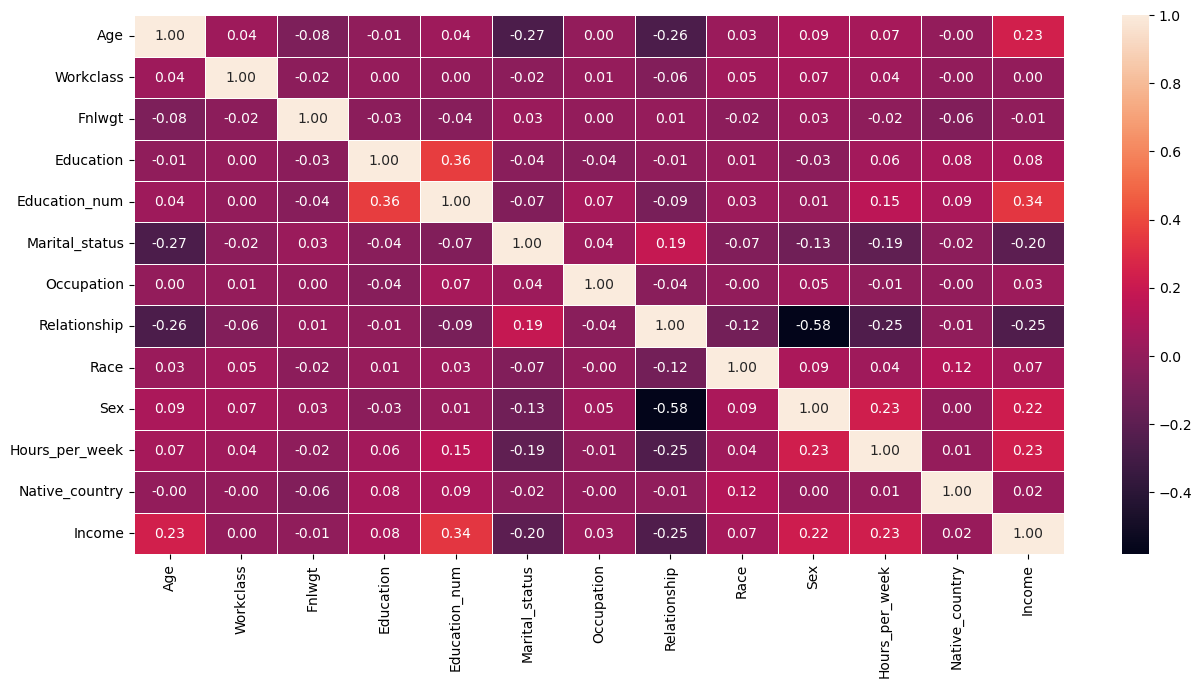

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')
plt.show()

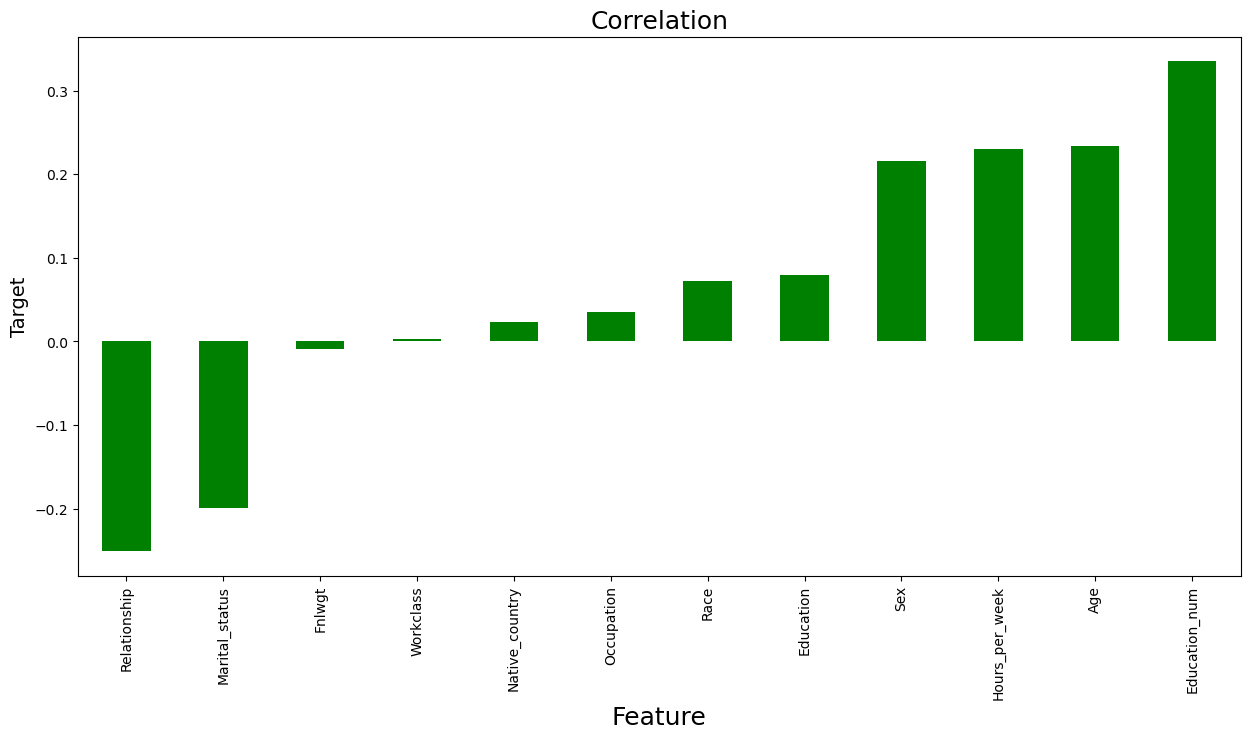

In [62]:
plt.figure(figsize=(15,7))
df.corr()['Income'].sort_values(ascending=True).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [63]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

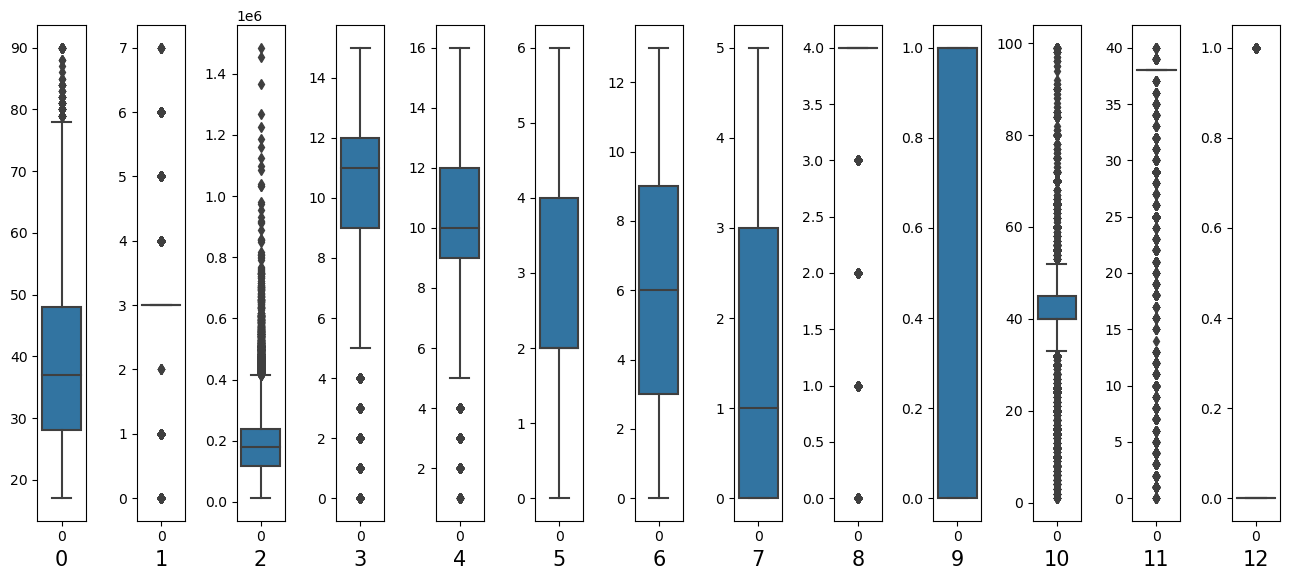

In [64]:
collist=df.columns.values
ncol=13
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=df[collist[column]],orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

In [65]:
variables = df[['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']]
z=np.abs(zscore(variables))

census_income = df[(z<3).all(axis=1)]
census_income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0


In [66]:
z.head()

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.22212
1,0.042640,0.245046,0.420027,0.03543
2,1.057031,0.425770,1.197429,0.03543
3,0.775755,1.408146,1.134779,0.03543
4,0.115952,0.898170,1.523480,0.03543


In [67]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",census_income.shape)
print("Total Dropped rows:",df.shape[0]-census_income.shape[0])

Old DataFrame data in Rows and Column: (32560, 13)
New DataFrame data in Rows and Column: (31461, 13)
Total Dropped rows: 1099


In [68]:
loss_percentage=(32560-31461)/32560*100
print(loss_percentage,'%')

3.3753071253071254 %


In [69]:
census_income.skew()

Age               0.472279
Workclass         0.077358
Fnlwgt            0.634828
Education        -0.949556
Education_num    -0.159752
Marital_status   -0.025162
Occupation        0.003278
Relationship      0.777721
Race             -2.453934
Sex              -0.708658
Hours_per_week   -0.341724
Native_country   -4.362026
Income            1.205962
dtype: float64

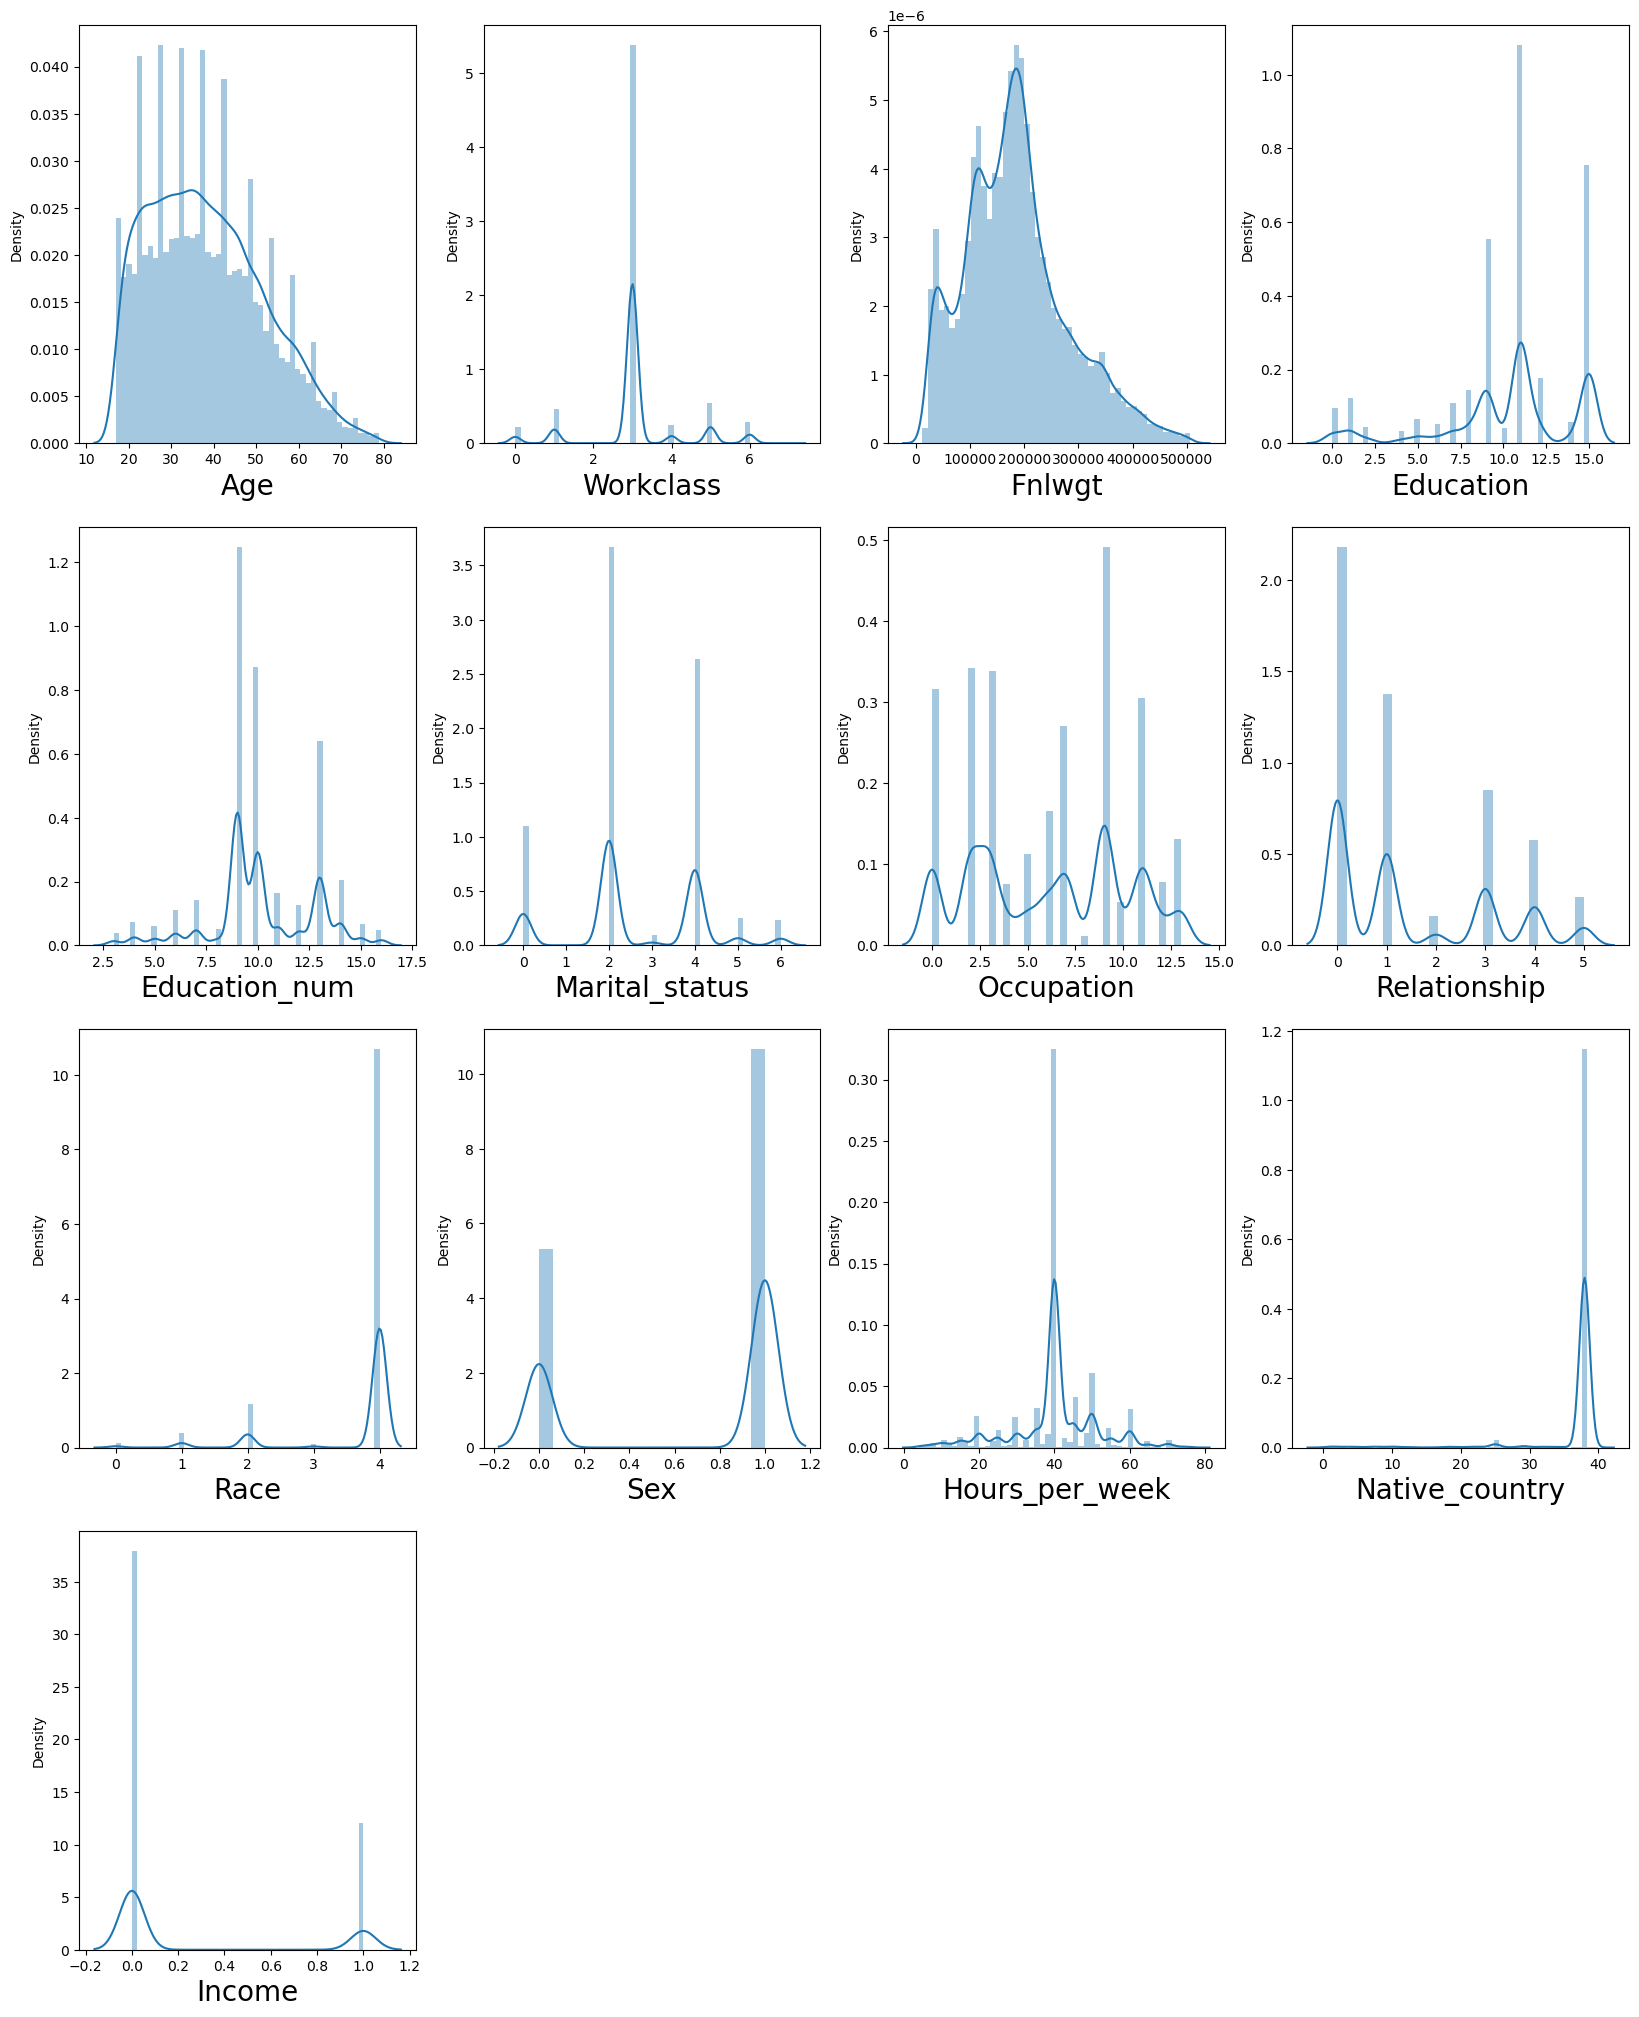

In [70]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in census_income:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(census_income[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

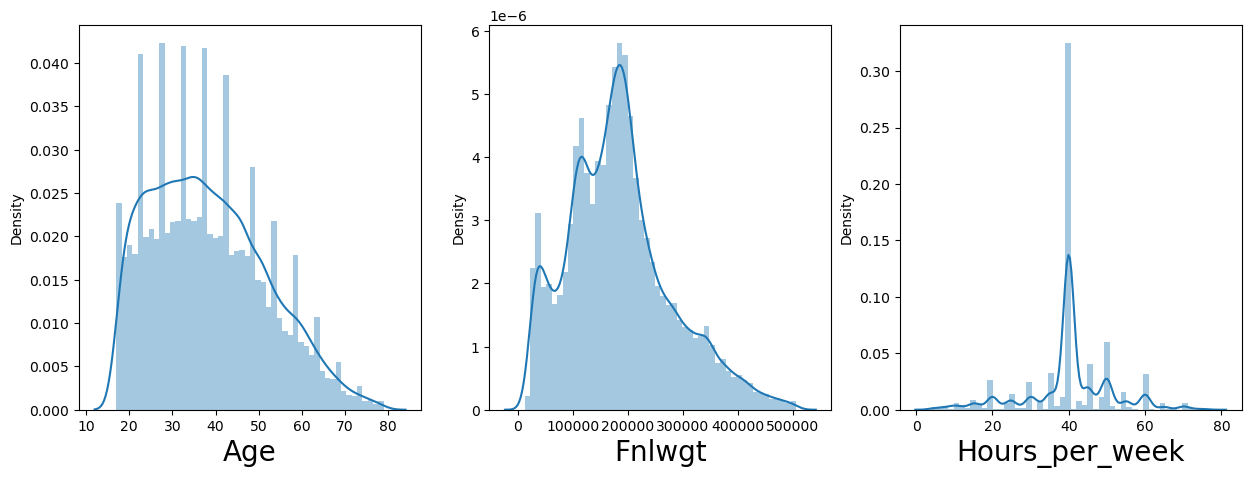

In [71]:
collist=['Age', 'Fnlwgt', 'Hours_per_week']
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in census_income[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(census_income[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [72]:
from sklearn.preprocessing import PowerTransformer

In [73]:
collist=['Age', 'Fnlwgt', 'Hours_per_week']
census_income[collist]=power_transform(census_income[collist],method='yeo-johnson')
census_income[collist]

,Age,Fnlwgt,Hours_per_week
0,0.915570,-1.114171,-2.228173
1,0.109856,0.427192,-0.053366
2,1.093043,0.607320,-0.053366
3,-0.729959,1.487719,-0.053366
4,0.034167,1.048962,-0.053366
...,...,...,...
32555,-0.826095,0.812145,-0.235369
32556,0.256719,-0.207385,-0.053366
32557,1.372134,-0.235114,-0.053366
32558,-1.352384,0.288776,-1.732436


In [74]:
census_income.skew()

Age              -0.019700
Workclass         0.077358
Fnlwgt           -0.034507
Education        -0.949556
Education_num    -0.159752
Marital_status   -0.025162
Occupation        0.003278
Relationship      0.777721
Race             -2.453934
Sex              -0.708658
Hours_per_week    0.107284
Native_country   -4.362026
Income            1.205962
dtype: float64

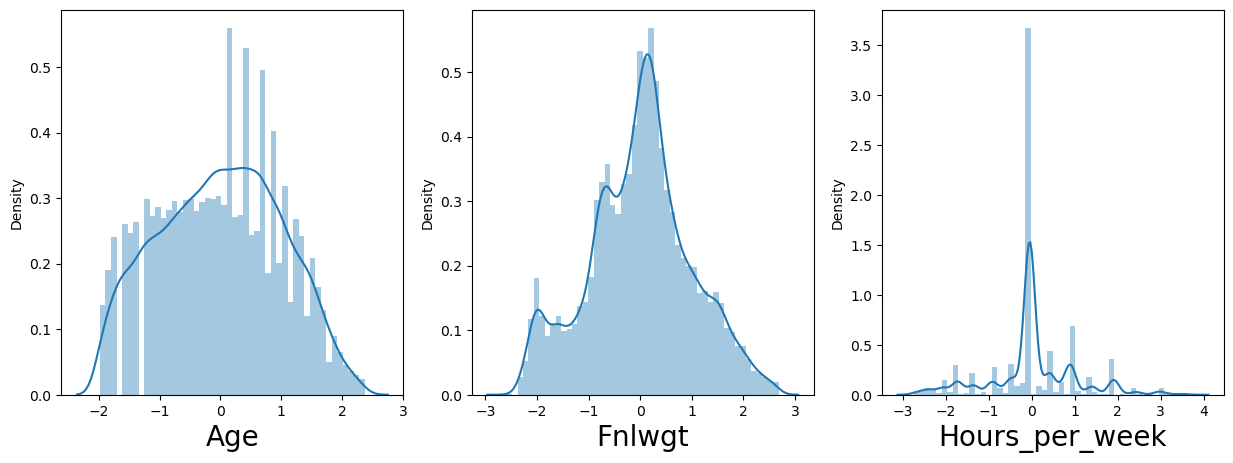

In [75]:
collist=['Age', 'Fnlwgt', 'Hours_per_week']
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in census_income[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(census_income[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [76]:
x=census_income.drop("Income",axis=1)
y=census_income["Income"]

In [77]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [78]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.915570,5,-1.114171,9,13,2,3,0,4,1,-2.228173,38
1,0.109856,3,0.427192,11,9,0,5,1,4,1,-0.053366,38
2,1.093043,3,0.607320,1,7,2,5,0,2,1,-0.053366,38
3,-0.729959,3,1.487719,9,13,2,9,5,2,0,-0.053366,4
4,0.034167,3,1.048962,12,14,2,3,5,4,0,-0.053366,38


In [79]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [80]:
x.shape, y.shape

((31461, 12), (31461,))

In [81]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [82]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [83]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [84]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

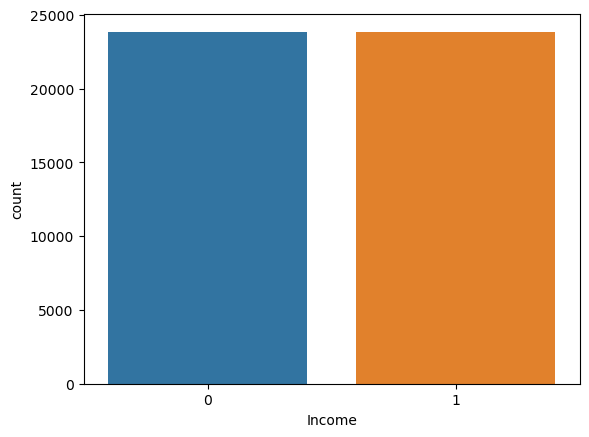

In [85]:
sns.countplot(y)

In [86]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [87]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.816074,1.696063,-1.155090,-0.427075,0.931889,-0.315129,-0.805350,-0.730268,0.366027,0.621286,-2.472772,0.247499
1,-0.060384,-0.054946,0.446604,0.139020,-0.647544,-1.822853,-0.301999,-0.116585,0.366027,0.621286,-0.203909,0.247499
2,1.009129,-0.054946,0.633783,-2.691454,-1.437261,-0.315129,-0.301999,-0.730268,-2.089905,0.621286,-0.203909,0.247499
3,-0.973937,-0.054946,1.548642,-0.427075,0.931889,-0.315129,0.704703,2.338147,-2.089905,-1.609564,-0.203909,-5.442548
4,-0.142719,-0.054946,1.092712,0.422067,1.326747,-0.315129,-0.805350,2.338147,0.366027,-1.609564,-0.203909,0.247499


In [88]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [89]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [90]:
x.columns[var_threshold.get_support()]

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [91]:
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [92]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [93]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [94]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

           Feature        Score
4    Education_num  8266.277130
0              Age  6570.658876
7     Relationship  4795.673357
10  Hours_per_week  4453.592910
5   Marital_status  3741.529067
9              Sex  3187.673466
3        Education   427.105448
8             Race   335.367541
6       Occupation    70.876067
1        Workclass    21.554541
11  Native_country    11.555026
2           Fnlwgt     1.382267


In [95]:
x = x.drop([ "Fnlwgt"],axis=1)

In [96]:
x.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_per_week',
       'Native_country'],
      dtype='object')

In [97]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.207682,Age
1,1.007576,Workclass
2,1.083404,Education
3,1.145172,Education_num
4,1.160240,Marital_status
5,1.017126,Occupation
6,1.967147,Relationship
7,1.043450,Race
8,1.826359,Sex
9,1.157730,Hours_per_week


In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8292342090553382  on Random_state  76


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [101]:
x.shape, y.shape

((47706, 11), (47706,))

In [102]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((33394, 11), (33394,), (14312, 11), (14312,))

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7509782001117943
confusion_matrix: 
 [[5156 1950]
 [1614 5592]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7106
           1       0.74      0.78      0.76      7206

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

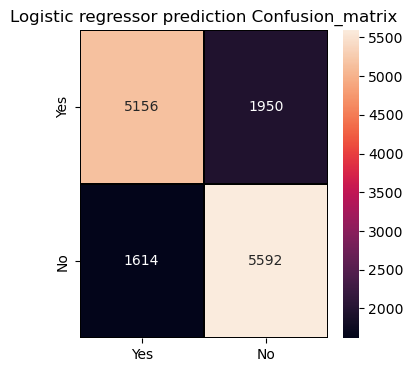

In [105]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8575321408608161
confusion_matrix: 
 [[6022 1084]
 [ 955 6251]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      7106
           1       0.85      0.87      0.86      7206

    accuracy                           0.86     14312
   macro avg       0.86      0.86      0.86     14312
weighted avg       0.86      0.86      0.86     14312



Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

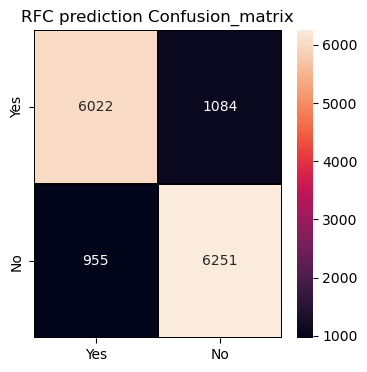

In [108]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

In [109]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8296534376746786
confusion_matrix: 
 [[5928 1178]
 [1260 5946]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      7106
           1       0.83      0.83      0.83      7206

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

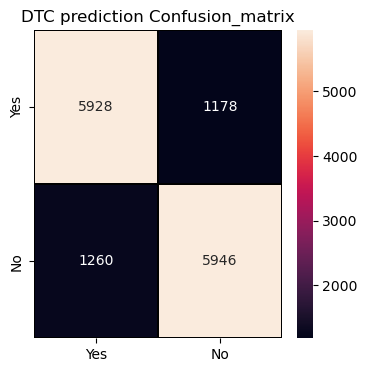

In [110]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

In [111]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.7521660145332588
confusion_matrix: 
 [[5018 2088]
 [1459 5747]]
classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      7106
           1       0.73      0.80      0.76      7206

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

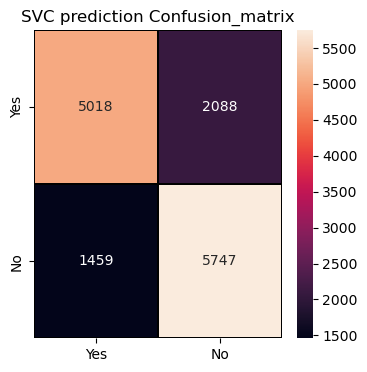

In [112]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("SVC prediction Confusion_matrix")

In [113]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8253912800447177
confusion_matrix: 
 [[5496 1610]
 [ 889 6317]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      7106
           1       0.80      0.88      0.83      7206

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.82     14312
weighted avg       0.83      0.83      0.82     14312



Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

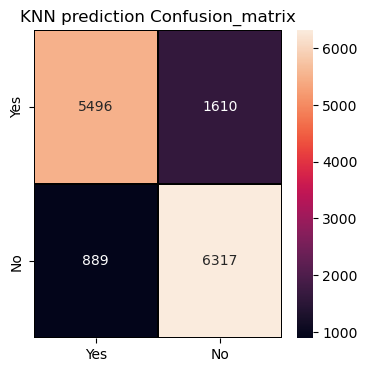

In [114]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

In [115]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7502202224419005


In [116]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.857252103361523


In [117]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8187251894003509


In [118]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.7520439174676001


In [119]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8302104887222266


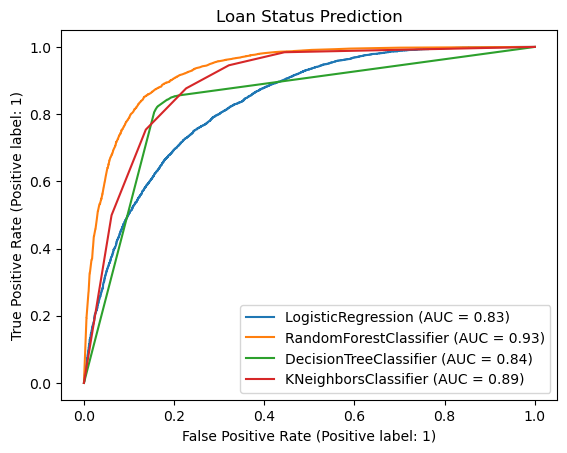

In [120]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)

plt.title("Loan Status Prediction")
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

In [121]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [123]:
rfc=RandomForestClassifier(random_state=30)

In [124]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [125]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [ ]:
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
Census_Income=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
Census_Income.fit(x_train,y_train)
predict=Census_Income.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,predict))
print("confusion_matrix: \n",confusion_matrix(y_test,predict))
print("classification_report: \n",classification_report(y_test,predict))

In [ ]:
acc=accuracy_score(y_test,pred)
print(acc*100)

In [ ]:
cm = confusion_matrix(y_test, predict)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,predict)
auc = roc_auc_score(y_test,predict)

In [ ]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Census Income Prediction")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
filename='Census_Income_Project.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

In [ ]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Census_Income_Project=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Census_Income_Project

In [ ]:
model =Census_Income_Project.to_csv('Census_Income_Project.csv')
model